# <font color='#004AAD'>Importing Necessary Library and Loading the Datasets</font>

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix                  
from sklearn.metrics import roc_curve, roc_auc_score, auc, precision_recall_curve

In [2]:
# loading the dataset
df = pd.read_csv('Livestock_and_Cash_Crop_Production_Nepal.csv')

In [3]:
# Checking the first five rows of the dataset
df.head()

DISTRICT PROVINCE ECOLOGICAL BELT DEVELOPMENT REGION  BUFF  MUTTON  \
0      TAPLEJUNG    KOSHI        MOUNTAIN     EASTERN REGION   607      31   
1  SANKHUWASHAVA    KOSHI        MOUNTAIN     EASTERN REGION  1646      41   
2     SOLUKHUMBU    KOSHI        MOUNTAIN     EASTERN REGION  1123      28   
3      PANCHTHAR    KOSHI            HILL     EASTERN REGION  1496       4   
4          ILLAM    KOSHI            HILL     EASTERN REGION  1974       1   

   CHEVON  PORK  CHICKEN  DUCK MEAT  ...  SHEEPS NO.  SHEEP WOOL PRODUCED  \
0     491   443      172          0  ...        5777                 3519   
1     958   509      302          1  ...       12181                 9050   
2     416   428      166          0  ...        8461                 6286   
3     940   730      248          1  ...        1338                  994   
4     870   416      104          0  ...         160                  118   

   HORSES/ASSES  RABBIT  YAK/NAK/CHAURI  COTTON AREA (Ha.)  \
0         543.0   506.0          3465.0                0.0   
1         358.0   313.0          3945.0                0.0   
2        1775.0   105.0         12235.0                0.0   
3          15.0    29.0          1075.0                0.0   
4        2815.0   240.0           165.0                0.0   

   COTTON PROD. (Mt.)  COTTON YIELD (Kg/Ha)   LATITUDE  LONGITUDE  
0                 0.0                   0.0  27.618589  87.856661  
1                 0.0                   0.0  27.524544  87.298556  
2                 0.0                   0.0  27.754234  86.698792  
3                 0.0                   0.0  27.059531  87.820004  
4                 0.0                   0.0  26.856045  87.945208  

[5 rows x 31 columns]

In [4]:
# Checking the last five rows of the dataset
df.tail()

DISTRICT       PROVINCE ECOLOGICAL BELT  DEVELOPMENT REGION  BUFF  \
70        DOTI  SUDUR-PASCHIM            HILL  FAR-WESTERN REGION  1625   
71     BAITADI  SUDUR-PASCHIM            HILL  FAR-WESTERN REGION  1727   
72  DADELDHURA  SUDUR-PASCHIM            HILL  FAR-WESTERN REGION  1011   
73     KAILALI  SUDUR-PASCHIM           TERAI  FAR-WESTERN REGION  5962   
74  KANCHANPUR  SUDUR-PASCHIM           TERAI  FAR-WESTERN REGION  3816   

    MUTTON  CHEVON  PORK  CHICKEN  DUCK MEAT  ...  SHEEPS NO.  \
70       2     840    40      106          0  ...         662   
71       1     730    12       14          0  ...         304   
72       1     823    29       70          0  ...         315   
73      71    1480   469     1303          4  ...       21267   
74      27     850   360     1085          2  ...        7953   

    SHEEP WOOL PRODUCED  HORSES/ASSES  RABBIT  YAK/NAK/CHAURI  \
70                  491         252.0   432.0             0.0   
71                  225         484.0     0.0             0.0   
72                  234         241.0     0.0             0.0   
73                15801           0.0     0.0             0.0   
74                 5909           0.0     0.0             0.0   

    COTTON AREA (Ha.)  COTTON PROD. (Mt.)  COTTON YIELD (Kg/Ha)   LATITUDE  \
70                0.0                 0.0                   0.0  29.176124   
71                0.0                 0.0                   0.0  29.483380   
72                0.0                 0.0                   0.0  29.227475   
73                0.0                 0.0                   0.0  28.760919   
74                0.0                 0.0                   0.0  28.834795   

    LONGITUDE  
70  80.885310  
71  80.535669  
72  80.485401  
73  80.826350  
74  80.382090  

[5 rows x 31 columns]

# <font color='#004AAD'>Exploratory Data Analysis</font>

In [5]:
# understanding dataset columns and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DISTRICT               75 non-null     object 
 1   PROVINCE               75 non-null     object 
 2   ECOLOGICAL BELT        75 non-null     object 
 3   DEVELOPMENT REGION     75 non-null     object 
 4   BUFF                   75 non-null     int64  
 5   MUTTON                 75 non-null     int64  
 6   CHEVON                 75 non-null     int64  
 7   PORK                   75 non-null     int64  
 8   CHICKEN                75 non-null     int64  
 9   DUCK MEAT              75 non-null     int64  
 10  TOTAL MEAT             75 non-null     int64  
 11  MILKING COWS NO.       75 non-null     int64  
 12  MILKING BUFFALOES NO.  75 non-null     int64  
 13  COW MILK               75 non-null     int64  
 14  BUFF MILK              75 non-null     int64  
 15  TOTAL MI

## <font color="green">Statistical Summary</font>
Descriptive statistics of various commodities

In [6]:
# getting statistical description of the dataset
df.describe()

BUFF      MUTTON       CHEVON         PORK      CHICKEN  \
count    75.000000   75.000000    75.000000    75.000000    75.000000   
mean   2333.400000   35.786667   874.440000   313.453333   733.880000   
std    1457.076673   42.003955   564.018982   278.424588  1240.912262   
min       0.000000    0.000000    56.000000     1.000000     5.000000   
25%    1253.500000    5.500000   459.500000   110.000000   169.500000   
50%    2145.000000   23.000000   801.000000   245.000000   405.000000   
75%    3251.000000   50.500000  1150.000000   435.500000   814.500000   
max    5962.000000  240.000000  3352.000000  1115.000000  9810.000000   

       DUCK MEAT    TOTAL MEAT  MILKING COWS NO.  MILKING BUFFALOES NO.  \
count  75.000000     75.000000          75.00000              75.000000   
mean    3.160000   4294.120000       13681.80000           18071.786667   
std     5.370188   2889.555595        9380.16219           12057.854970   
min     0.000000     78.000000         452.00000               0.000000   
25%     0.000000   2548.500000        6716.50000            9191.500000   
50%     1.000000   3539.000000       12998.00000           16342.000000   
75%     3.500000   6158.000000       17397.00000           25979.000000   
max    28.000000  17753.000000       56521.00000           48934.000000   

           COW MILK  ...    SHEEPS NO.  SHEEP WOOL PRODUCED  HORSES/ASSES  \
count     75.000000  ...     75.000000            75.000000     75.000000   
mean    8584.093333  ...  10675.440000          7844.640000    744.106667   
std     6841.254483  ...  12518.974483          9300.782168   1436.458686   
min      259.000000  ...     36.000000            13.000000      0.000000   
25%     4293.500000  ...   1262.500000           937.500000      0.000000   
50%     6988.000000  ...   6851.000000          5090.000000    142.000000   
75%    11098.500000  ...  15824.000000         11757.000000    738.500000   
max    37387.000000  ...  72530.000000         53889.000000   6769.000000   

            RABBIT  YAK/NAK/CHAURI  COTTON AREA (Ha.)  COTTON PROD. (Mt.)  \
count    75.000000       75.000000          75.000000           75.000000   
mean    429.506667      917.746667           1.906667            1.693333   
std     695.926514     2165.964619          12.623630            9.785501   
min       0.000000        0.000000           0.000000            0.000000   
25%       0.000000        0.000000           0.000000            0.000000   
50%     131.000000        0.000000           0.000000            0.000000   
75%     523.000000      430.500000           0.000000            0.000000   
max    3816.000000    12235.000000         106.000000           74.000000   

       COTTON YIELD (Kg/Ha)   LATITUDE  LONGITUDE  
count             75.000000  75.000000  75.000000  
mean              45.586667  28.003789  84.254905  
std              234.851885   0.891612   2.185067  
min                0.000000  26.571975  80.382090  
25%                0.000000  27.273412  82.398773  
50%                0.000000  27.948879  84.235742  
75%                0.000000  28.679825  85.953751  
max             1519.000000  30.035133  87.955321  

[8 rows x 27 columns]

In [7]:
# getting the shape of the dataset
df.shape

(75, 31)

## <font color="green">Correlation Matrix</font>
Since the dataset contains various distinct commodities with **no meaningful relationship between them** and the there are **no complex interactions or dependencies between individual commodities group** and **no other variables from one commodity directly &  indirectly influence other commodity**, a combined correlation matrix may capture potential noise from unrelated variables. Thus, building separate correlation matrix can provide a clearer picture of the internal relationships within each group of variables. This approach allows to focus on the specific dynamics within specific commodity. Thus a distinct feature sets are selected.
### Feature Selection To Visualize Correlations Among Variables That Influences The Specific Commodity Group:
- **Meat Production**
    - BUFF, MUTTON, CHEVON, PORK, CHICKEN, DUCK MEAT, TOTAL MEAT
- **Milk Production**
    - TOTAL MILK PRODUCED, MILKING COWS NO., MILKING BUFFALOES NO., COW MILK, BUFF MILK
- **Egg Production**
    - TOTAL EGG, LAYING HEN, LAYING DUCK, HEN EGG, DUCK EGG
- **Wool Production**
    - SHEEPS NO., SHEEP WOOL PRODUCED
- **Cotton Production**
    - YIELD Kg/Ha, AREA (Ha.), PROD. (Mt.)

*The Category-2 Livestock Population Commodities (Horse/Asses, Yak/Nak, Rabbit) neither have internal relationships nor they influence other commodity group.*

### <font color="purple">Correlations Among Variables That Influences The Total Meat Production</font>

In [8]:
# Selecting desired columns
selected_columns = ['TOTAL MEAT', 'BUFF', 'MUTTON', 'CHEVON', 'PORK', 'CHICKEN', 'DUCK MEAT']
df_selected = df[selected_columns]

# Calculating correlation matrix
correlation_matrix = df_selected.corr()

# Printing the correlation matrix
correlation_matrix

TOTAL MEAT      BUFF    MUTTON    CHEVON      PORK   CHICKEN  \
TOTAL MEAT    1.000000  0.914056 -0.227641  0.765010  0.520238  0.795792   
BUFF          0.914056  1.000000 -0.250610  0.721056  0.464644  0.527985   
MUTTON       -0.227641 -0.250610  1.000000 -0.187381 -0.177442 -0.143979   
CHEVON        0.765010  0.721056 -0.187381  1.000000  0.411703  0.392021   
PORK          0.520238  0.464644 -0.177442  0.411703  1.000000  0.258450   
CHICKEN       0.795792  0.527985 -0.143979  0.392021  0.258450  1.000000   
DUCK MEAT     0.639154  0.637701 -0.162199  0.496475  0.436042  0.417200   

            DUCK MEAT  
TOTAL MEAT   0.639154  
BUFF         0.637701  
MUTTON      -0.162199  
CHEVON       0.496475  
PORK         0.436042  
CHICKEN      0.417200  
DUCK MEAT    1.000000

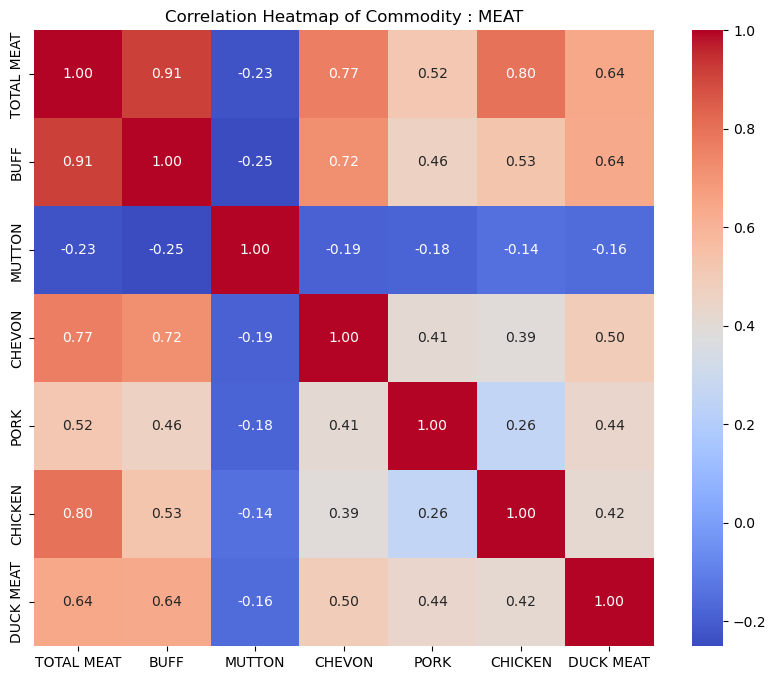

In [9]:
# visualizing correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Commodity : MEAT')
plt.show()

#### <font color="red">Interpretation</font>
The correlation matrix reveals strong positive correlations among various types of meat production, with total meat production being highly positively correlated with buff meat and pork production, indicated by correlation coefficients of approximately 0.999 and 0.996, respectively. Additionally, there is a relatively strong positive correlation of approximately 0.967 between mutton and duck meat production. These findings suggest that increases in total meat production are closely associated with increases in buff meat, pork, and to a slightly lesser extent, mutton and duck meat production. 


### <font color="purple">Correlations Among Variables That Influences The Total Milk Production</font>

In [10]:
# Selecting desired columns
selected_columns = ['TOTAL MILK PRODUCED', 'MILKING COWS NO.', 'MILKING BUFFALOES NO.', 'COW MILK', 'BUFF MILK']
df_selected = df[selected_columns]

# Calculating correlation matrix
correlation_matrix = df_selected.corr()

# Printing the correlation matrix
correlation_matrix

TOTAL MILK PRODUCED  MILKING COWS NO.  \
TOTAL MILK PRODUCED               1.000000          0.729867   
MILKING COWS NO.                  0.729867          1.000000   
MILKING BUFFALOES NO.             0.762105          0.568883   
COW MILK                          0.854584          0.902348   
BUFF MILK                         0.956100          0.540606   

                       MILKING BUFFALOES NO.  COW MILK  BUFF MILK  
TOTAL MILK PRODUCED                 0.762105  0.854584   0.956100  
MILKING COWS NO.                    0.568883  0.902348   0.540606  
MILKING BUFFALOES NO.               1.000000  0.565044   0.777311  
COW MILK                            0.565044  1.000000   0.664886  
BUFF MILK                           0.777311  0.664886   1.000000

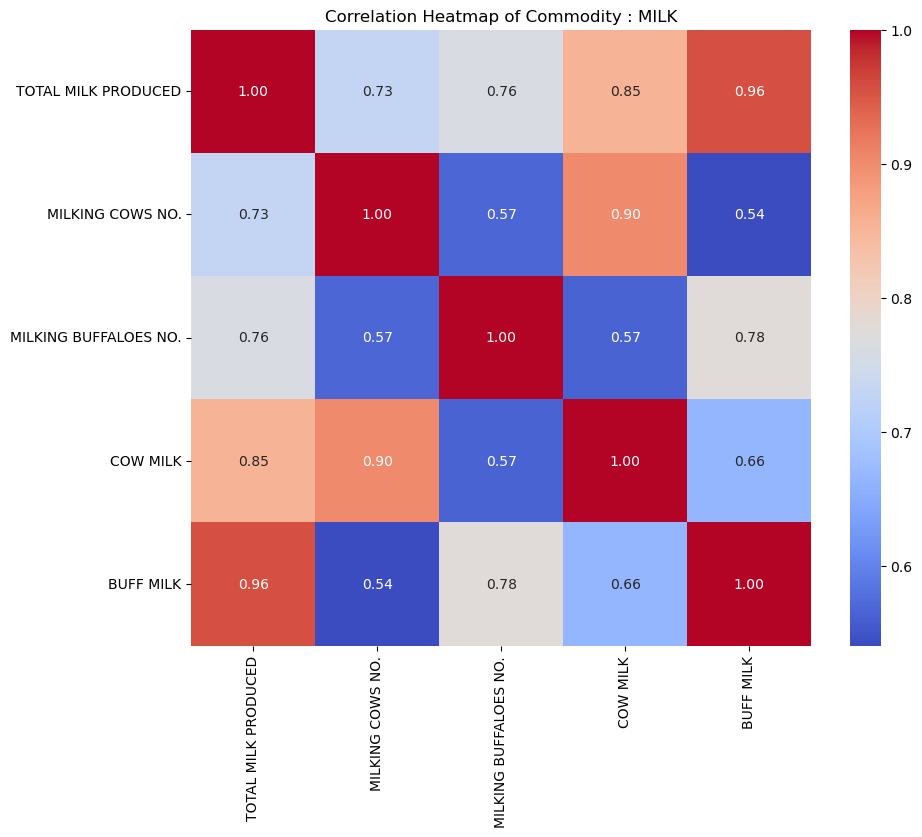

In [11]:
# visualizing correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Commodity : MILK')
plt.show()

#### <font color="red">Interpretation</font>
From the matrix, it's evident that there are strong positive correlations between total milk produced and each of the individual components (milking cows, milking buffaloes, cow milk, and buffalo milk), with correlation coefficients close to 1. Additionally, there are strong positive correlations between milking cows and milking buffaloes, as well as between cow milk and buffalo milk. This suggests that the variables are highly interrelated, indicating a consistent pattern in milk production across different categories.


### <font color="purple">Correlations Among Variables That Influences The Total Egg Production</font>

In [12]:
# Selecting desired columns
selected_columns = ['TOTAL EGG', 'LAYING HEN', 'LAYING DUCK', 'HEN EGG', 'DUCK EGG']
df_selected = df[selected_columns]

# Calculating correlation matrix
correlation_matrix = df_selected.corr()

# Printing the correlation matrix
correlation_matrix

TOTAL EGG  LAYING HEN  LAYING DUCK   HEN EGG  DUCK EGG
TOTAL EGG     1.000000    0.958335     0.096142  0.999980  0.138678
LAYING HEN    0.958335    1.000000     0.153292  0.957933  0.192341
LAYING DUCK   0.096142    0.153292     1.000000  0.089806  0.997548
HEN EGG       0.999980    0.957933     0.089806  1.000000  0.132363
DUCK EGG      0.138678    0.192341     0.997548  0.132363  1.000000

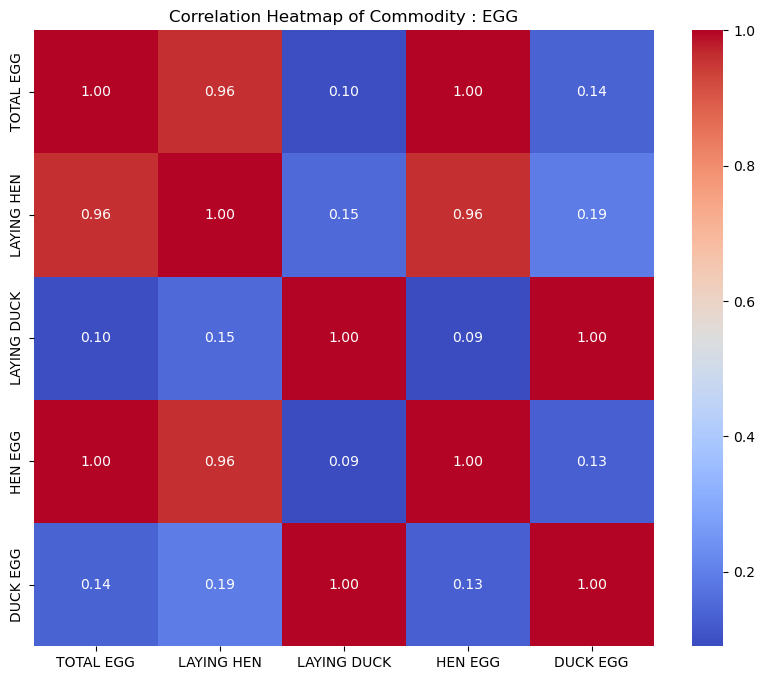

In [13]:
# visualizing correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Commodity : EGG')
plt.show()

#### <font color="red">Interpretation</font> 
Examining the matrix, it's apparent that there are strong positive correlations between total eggs produced and each of the individual components (laying hens, laying ducks, hen eggs, and duck eggs), with correlation coefficients close to 1. Additionally, there are strong positive correlations between laying hens and laying ducks, as well as between hen eggs and duck eggs. This suggests a consistent pattern in egg production across different categories, with the variables being highly interrelated.

### <font color="purple">Correlations Among Variables That Influences The Total Wool Production</font>

In [14]:
# Selecting desired columns
selected_columns = ['SHEEP WOOL PRODUCED', 'SHEEPS NO.']
df_selected = df[selected_columns]

# Calculating correlation matrix
correlation_matrix = df_selected.corr()

# Printing the correlation matrix
correlation_matrix

SHEEP WOOL PRODUCED  SHEEPS NO.
SHEEP WOOL PRODUCED             1.000000    0.999099
SHEEPS NO.                      0.999099    1.000000

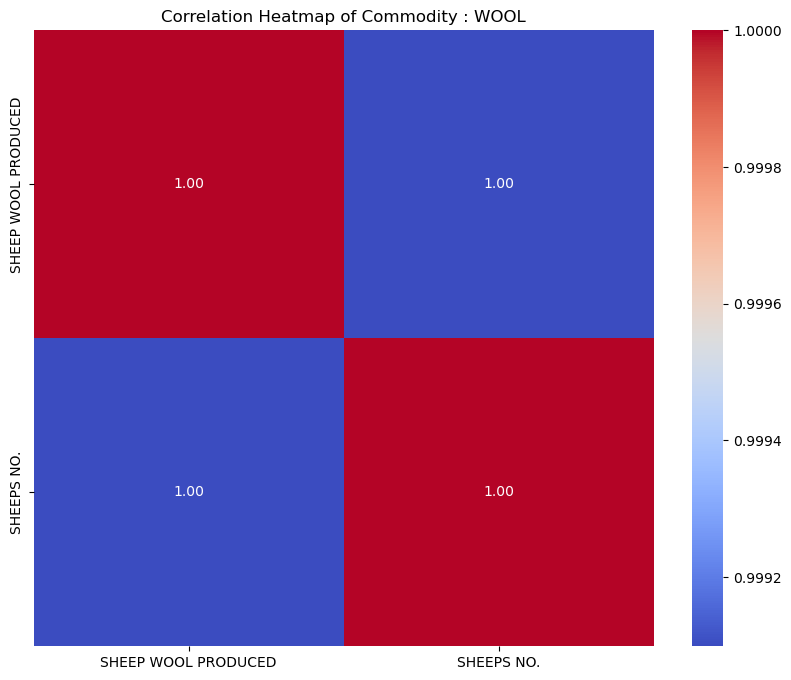

In [15]:
# visualizing correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Commodity : WOOL')
plt.show()

#### <font color="red">Interpretation</font> 
 In this case, both variables exhibit an extremely high positive correlation, with correlation coefficients very close to 1. This indicates a strong linear relationship between the amount of sheep wool produced and the number of sheep. Essentially, as the number of sheep increases, there is a proportional increase in the amount of wool produced. This suggests a direct and predictable connection between these two aspects of sheep farming.

### <font color="purple">Correlations Among Variables That Influences The Total Cotton Production</font>

In [16]:
# Selecting desired columns
selected_columns = ['COTTON YIELD (Kg/Ha)', 'COTTON AREA (Ha.)', 'COTTON PROD. (Mt.)']
df_selected = df[selected_columns]

# Calculating correlation matrix
correlation_matrix = df_selected.corr()

# Printing the correlation matrix
correlation_matrix

COTTON YIELD (Kg/Ha)  COTTON AREA (Ha.)  \
COTTON YIELD (Kg/Ha)              1.000000           0.550144   
COTTON AREA (Ha.)                 0.550144           1.000000   
COTTON PROD. (Mt.)                0.721437           0.965840   

                      COTTON PROD. (Mt.)  
COTTON YIELD (Kg/Ha)            0.721437  
COTTON AREA (Ha.)               0.965840  
COTTON PROD. (Mt.)              1.000000

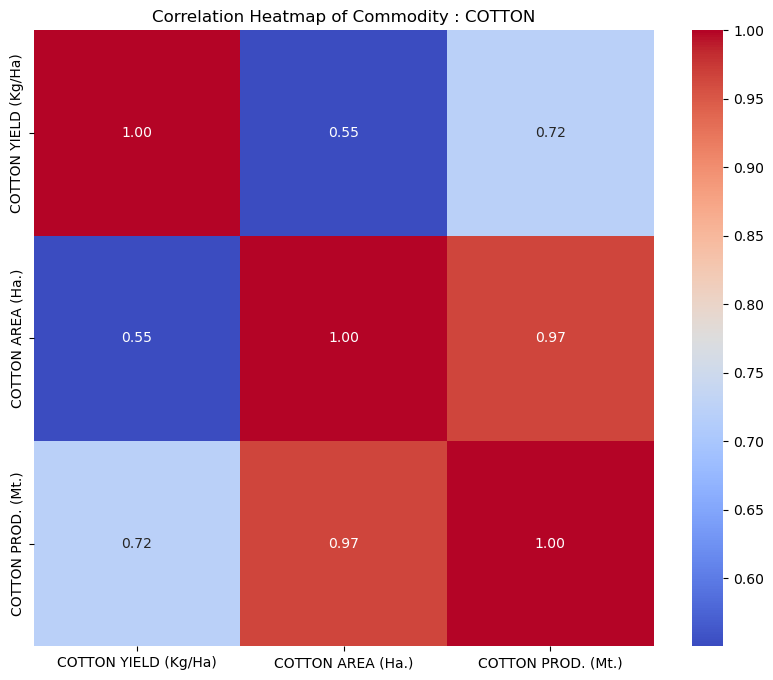

In [17]:
# visualizing correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Commodity : COTTON')
plt.show()

#### <font color="red">Interpretation</font> 
From the matrix, it's evident that there are positive correlations between all pairs of variables, with correlation coefficients ranging from approximately 0.61 to 0.99. Specifically, there is a moderate positive correlation between cotton yield and cotton area (correlation coefficient ≈ 0.61), a strong positive correlation between cotton area and cotton production (correlation coefficient ≈ 0.99), and a strong positive correlation between cotton yield and cotton production (correlation coefficient ≈ 0.69). These correlations suggest that higher cotton yields are associated with larger cotton areas, and consequently, greater cotton production, indicating a relationship between these variables in cotton farming.

## <font color="green">Geospatial Visualization : Analysis of Livestock Population, Production & Cash Crop Production Across All Districts Of Nepal</font>

### <font color="purple">Production Of Meat Across Nepal</font>

In [18]:
# Your DataFrame with district names, latitude, longitude, and meat production categories
meat_data = df[['DISTRICT', 'LATITUDE', 'LONGITUDE', 'BUFF', 'MUTTON', 'CHEVON', 'PORK', 'CHICKEN', 'DUCK MEAT', 'TOTAL MEAT']]

# Plot the map using plotly
fig = px.scatter_mapbox(meat_data, lat='LATITUDE', lon='LONGITUDE', color='TOTAL MEAT',
                        size='TOTAL MEAT', hover_name='DISTRICT',
                        hover_data={'DISTRICT': False, 'LATITUDE': False, 'LONGITUDE': False,
                                    'BUFF': True, 'MUTTON': True, 'CHEVON': True, 'PORK': True,
                                    'CHICKEN': True, 'DUCK MEAT': True, 'TOTAL MEAT': True},
                        color_continuous_scale=["#2E8B57", "#3CB371", "#32CD32", "#9ACD32", "#ADFF2F", "#7FFF00", "#00FF00"],
                        size_max=20, zoom=6)
fig.update_layout(mapbox_style="carto-positron", title='Total Meat Production in Nepal Districts',
                  margin={"r":0,"t":0,"l":0,"b":0})
fig.show()


### <font color="purple">Production Of Milk Across Nepal</font>

In [19]:
# Your DataFrame with district names, latitude, longitude, and milk production categories
milk_data = df[['DISTRICT', 'LATITUDE', 'LONGITUDE', 'COW MILK', 'BUFF MILK', 'TOTAL MILK PRODUCED']]

# Plot the map using plotly
fig = px.scatter_mapbox(milk_data, lat='LATITUDE', lon='LONGITUDE', color='TOTAL MILK PRODUCED',
                        size='TOTAL MILK PRODUCED', hover_name='DISTRICT',
                        hover_data={'DISTRICT': False, 'LATITUDE': False, 'LONGITUDE': False,
                                    'COW MILK': True, 'BUFF MILK': True, 'TOTAL MILK PRODUCED': True},
                        color_continuous_scale=["#800080", "#9A32CD", "#7B68EE", "#4169E1", "#87CEEB", "#00BFFF", "#1E90FF"],
                        size_max=20, zoom=6)
fig.update_layout(mapbox_style="carto-positron", title='Total Milk Production in Nepal Districts',
                  margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

### <font color="purple">Production Of Egg Across Nepal</font>

In [20]:
# Your DataFrame with district names, latitude, longitude, and egg production categories
egg_data = df[['DISTRICT', 'LATITUDE', 'LONGITUDE', 'LAYING HEN', 'LAYING DUCK', 'HEN EGG', 'DUCK EGG', 'TOTAL EGG']]

# Plot the map using plotly
fig = px.scatter_mapbox(egg_data, lat='LATITUDE', lon='LONGITUDE', color='TOTAL EGG',
                        size='TOTAL EGG', hover_name='DISTRICT',
                        hover_data={'DISTRICT': False, 'LATITUDE': False, 'LONGITUDE': False,
                                    'LAYING HEN': True, 'LAYING DUCK': True, 'HEN EGG': True, 'DUCK EGG': True, 'TOTAL EGG': True},
                        color_continuous_scale=["#330000", "#FF4500", "#FF6347", "#FF8C00", "#FFA500", "#FFD700", "#FFDEAD"],
                        size_max=40, zoom=6)
fig.update_layout(mapbox_style="carto-positron", title='Total Egg Production in Nepal Districts',
                  margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

### <font color="purple">Production Of Wool Across Nepal</font>

In [21]:
# Your DataFrame with district names, latitude, longitude, and wool production categories
wool_data = df[['DISTRICT', 'LATITUDE', 'LONGITUDE', 'SHEEPS NO.', 'SHEEP WOOL PRODUCED']]

# Plot the map using plotly
fig = px.scatter_mapbox(wool_data, lat='LATITUDE', lon='LONGITUDE', color='SHEEP WOOL PRODUCED',
                        size='SHEEP WOOL PRODUCED', hover_name='DISTRICT',
                        hover_data={'DISTRICT': False, 'LATITUDE': False, 'LONGITUDE': False,
                                    'SHEEPS NO.': True, 'SHEEP WOOL PRODUCED': True},
                        color_continuous_scale=["#8B4513", "#A0522D", "#CD853F", "#DEB887", "#D2B48C", "#F5DEB3", "#FFE4B5"],
                        size_max=40, zoom=6)
fig.update_layout(mapbox_style="carto-positron", title='Total Wool Production in Nepal Districts',
                  margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

### <font color="purple">Production Of Cotton Across Nepal</font>

In [22]:
# Your DataFrame with district names, latitude, longitude, and cotton production categories
cotton_data = df[['DISTRICT', 'LATITUDE', 'LONGITUDE','COTTON AREA (Ha.)','COTTON PROD. (Mt.)', 'COTTON YIELD (Kg/Ha)']]

# Plot the map using plotly
fig = px.scatter_mapbox(cotton_data, lat='LATITUDE', lon='LONGITUDE', color='COTTON YIELD (Kg/Ha)',
                        size='COTTON YIELD (Kg/Ha)', hover_name='DISTRICT',
                        hover_data={'DISTRICT': False, 'LATITUDE': False, 'LONGITUDE': False,
                                    'COTTON AREA (Ha.)': True, 'COTTON PROD. (Mt.)': True,
                                    'COTTON YIELD (Kg/Ha)': True},
                        color_continuous_scale=["#330000", "#660000", "#990000", "#CC0000", "#FF0000", "#FF3333", "#FF6666"],
                        size_max=40, zoom=6)
fig.update_layout(mapbox_style="carto-positron", title='Total Cotton Production in Nepal Districts',
                  margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

### <font color="purple">Horses/Asses Population Across Nepal</font>

In [23]:
# Your DataFrame with district names, latitude, longitude, and animal production categories
animal_data = df[['DISTRICT', 'LATITUDE', 'LONGITUDE', 'HORSES/ASSES']]

# Plot the map using plotly
fig = px.scatter_mapbox(animal_data, lat='LATITUDE', lon='LONGITUDE', color='HORSES/ASSES',
                        size='HORSES/ASSES', hover_name='DISTRICT',
                        hover_data={'DISTRICT': False, 'LATITUDE': False, 'LONGITUDE': False,
                                    'HORSES/ASSES': True},
                        color_continuous_scale=["#FF4500", "#FF6347", "#FF8C00", "#FFA500", "#FFD700", "#FFDEAD", "#FFE4B5"],
                        size_max=40, zoom=6)
fig.update_layout(mapbox_style="carto-positron", title='Animal Production in Nepal Districts',
                  margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

### <font color="purple">Rabbit Population Across Nepal</font>

In [24]:
# Your DataFrame with district names, latitude, longitude, and rabbit production categories
rabbit_data = df[['DISTRICT', 'LATITUDE', 'LONGITUDE', 'RABBIT']]

# Plot the map using plotly
fig = px.scatter_mapbox(rabbit_data, lat='LATITUDE', lon='LONGITUDE', color='RABBIT',
                        size='RABBIT', hover_name='DISTRICT',
                        hover_data={'DISTRICT': False, 'LATITUDE': False, 'LONGITUDE': False,
                                    'RABBIT': True},
                        color_continuous_scale=["#008000", "#228B22", "#32CD32", "#ADFF2F", "#7FFF00", "#90EE90", "#98FB98"],
                        size_max=40, zoom=6)
fig.update_layout(mapbox_style="carto-positron", title='Rabbit Production in Nepal Districts',
                  margin={"r":0,"t":0,"l":0,"b":0})
fig.show()


### <font color="purple">Yaks/Naks/Chauris Population Across Nepal</font>

In [25]:
# Your DataFrame with district names, latitude, longitude, and yak/nak production categories
yak_data = df[['DISTRICT', 'LATITUDE', 'LONGITUDE', 'YAK/NAK/CHAURI']]

# Plot the map using plotly
fig = px.scatter_mapbox(yak_data, lat='LATITUDE', lon='LONGITUDE', color='YAK/NAK/CHAURI',
                        size='YAK/NAK/CHAURI', hover_name='DISTRICT',
                        hover_data={'DISTRICT': False, 'LATITUDE': False, 'LONGITUDE': False,
                                    'YAK/NAK/CHAURI': True},
                        color_continuous_scale=["#483D8B", "#6A5ACD", "#7B68EE", "#9370DB", "#8A2BE2", "#9932CC", "#9400D3"],
                        size_max=40, zoom=6)
fig.update_layout(mapbox_style="carto-positron", title='Yak/Nak/Chauri Production in Nepal Districts',
                  margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

## <font color="green">Visual Insights : Data Distributions</font>

### <font color="purple">Meat Production</font>

**Meat Production Distribution Of Various Types of Meat Across Districts Of Nepal**

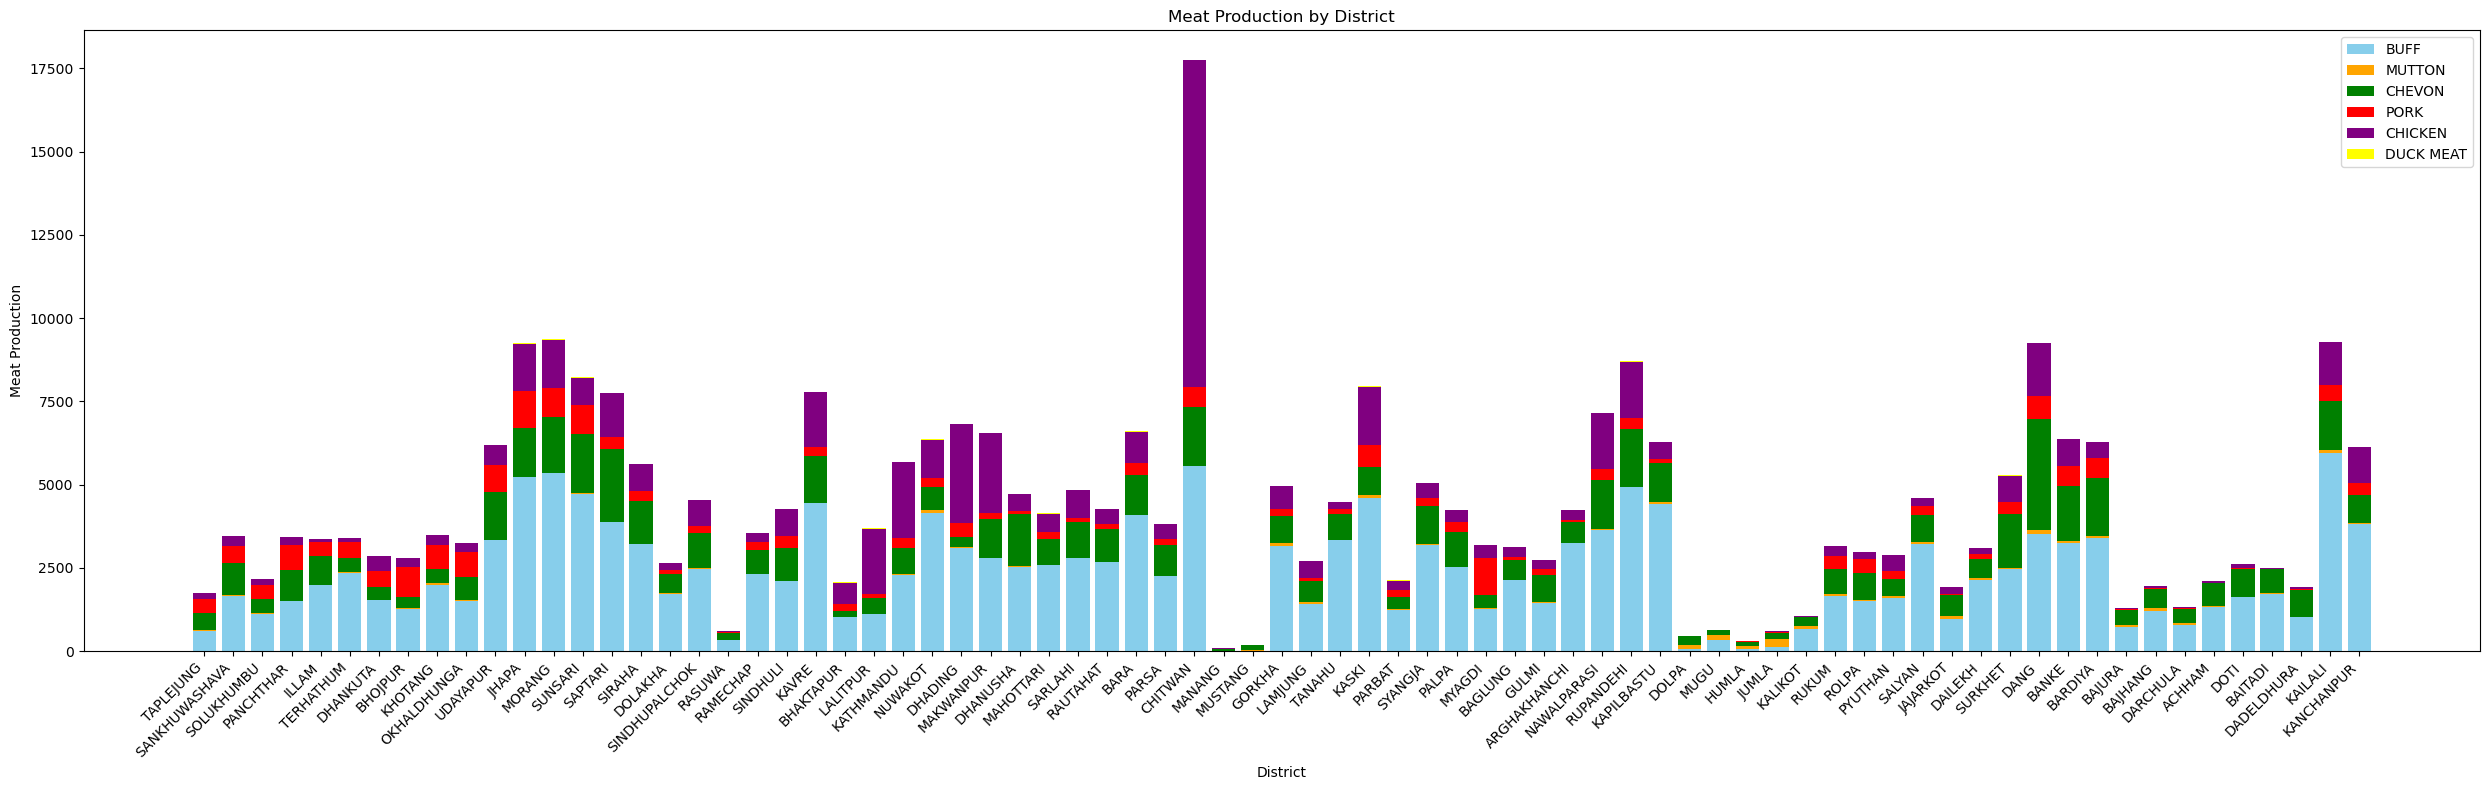

In [26]:
districts = df['DISTRICT']
buff = df['BUFF']
mutton = df['MUTTON']
chevon = df['CHEVON']
pork = df['PORK']
chicken = df['CHICKEN']
duck_meat = df['DUCK MEAT']

# Plotting the histograms
plt.figure(figsize=(25, 8))

# Histogram for BUFF
plt.bar(districts, buff, color='skyblue', label='BUFF')
# Histogram for MUTTON
plt.bar(districts, mutton, color='orange', bottom=buff, label='MUTTON')
# Histogram for CHEVON
plt.bar(districts, chevon, color='green', bottom=buff + mutton, label='CHEVON')
# Histogram for PORK
plt.bar(districts, pork, color='red', bottom=buff + mutton + chevon, label='PORK')
# Histogram for CHICKEN
plt.bar(districts, chicken, color='purple', bottom=buff + mutton + chevon + pork, label='CHICKEN')
# Histogram for DUCK MEAT
plt.bar(districts, duck_meat, color='yellow', bottom=buff + mutton + chevon + pork + chicken, label='DUCK MEAT')

plt.title('Meat Production by District')
plt.xlabel('District')
plt.ylabel('Meat Production')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()  # Adjust layout to prevent label overlap
plt.show()

**Total Meat Production Distribution Across Districts Of Nepal**

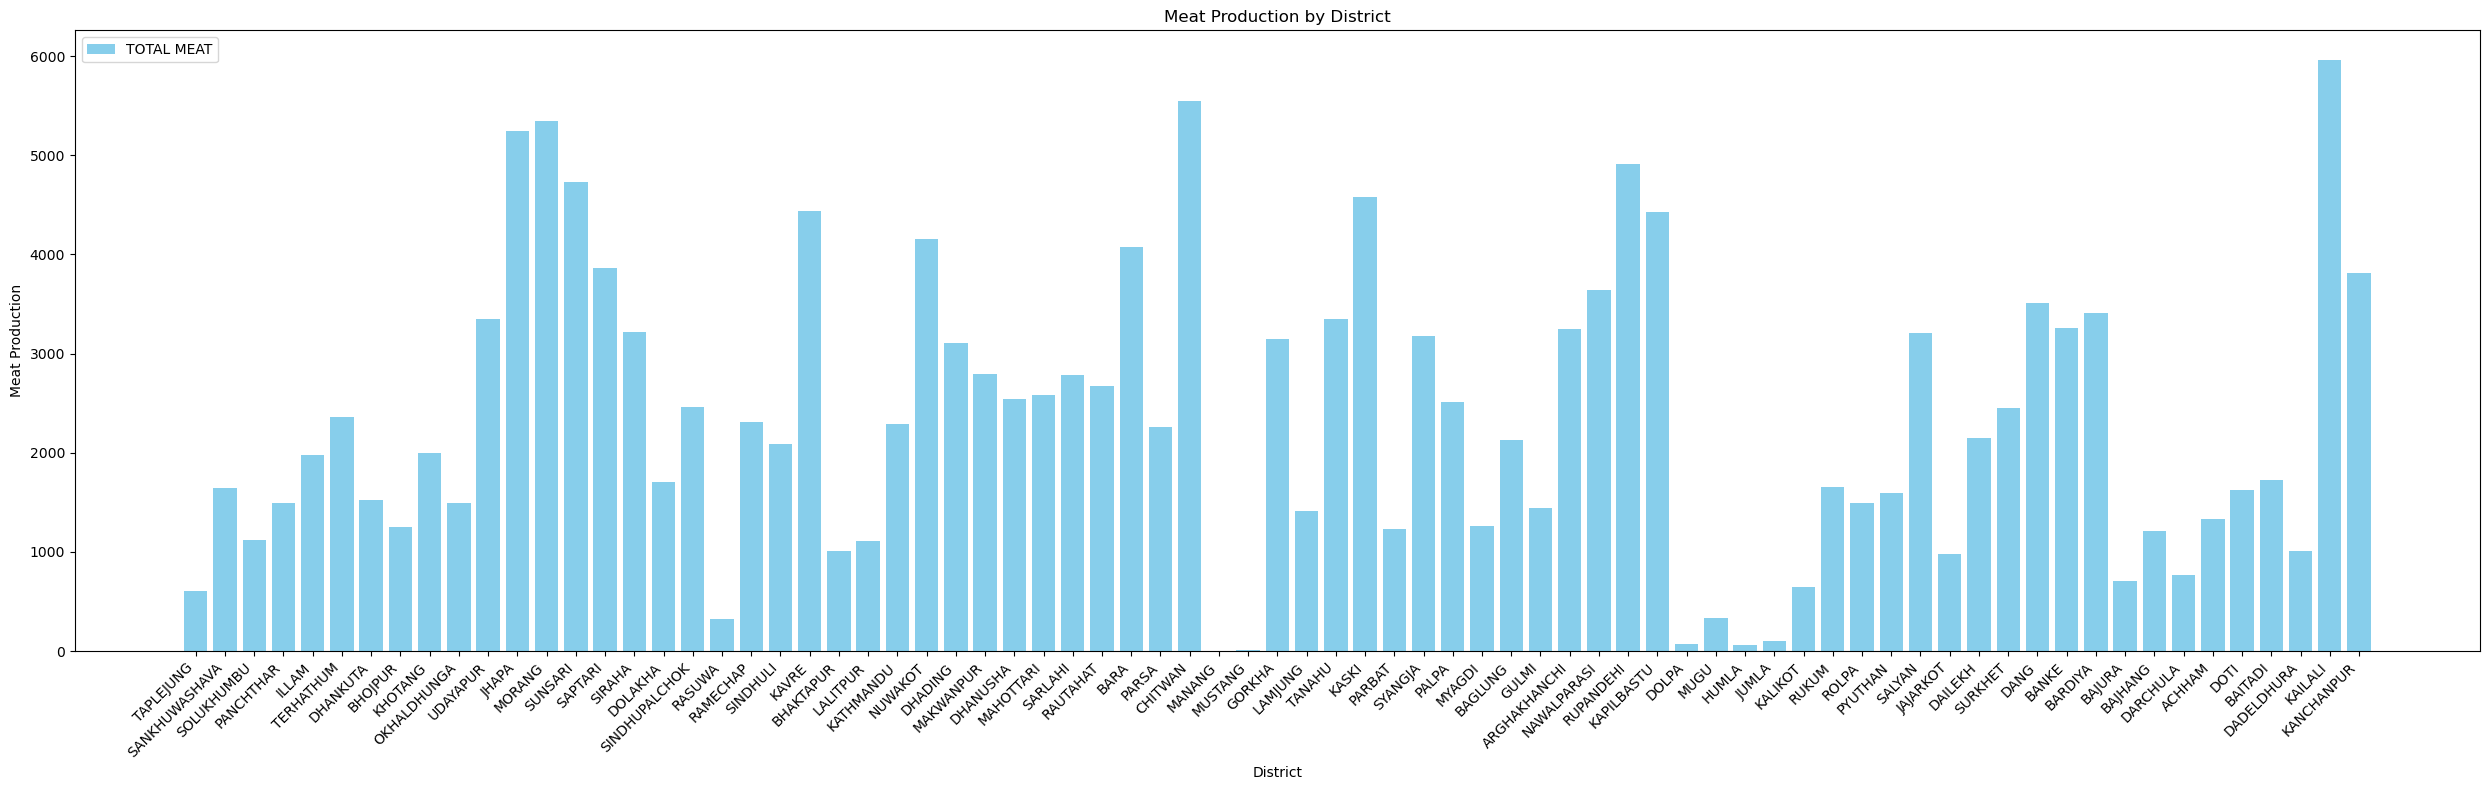

In [27]:
districts = df['DISTRICT']
total_meat = df['TOTAL MEAT']


# Plotting the histograms
plt.figure(figsize=(25, 8))

# Histogram for TOTAL MEAT
plt.bar(districts, buff, color='skyblue', label='TOTAL MEAT')

plt.title('Meat Production by District')
plt.xlabel('District')
plt.ylabel('Meat Production')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()  # Adjust layout to prevent label overlap
plt.show()

### <font color="purple">Milk Production</font>

**Milk Production Distribution From Various Livestock Across Districts Of Nepal**

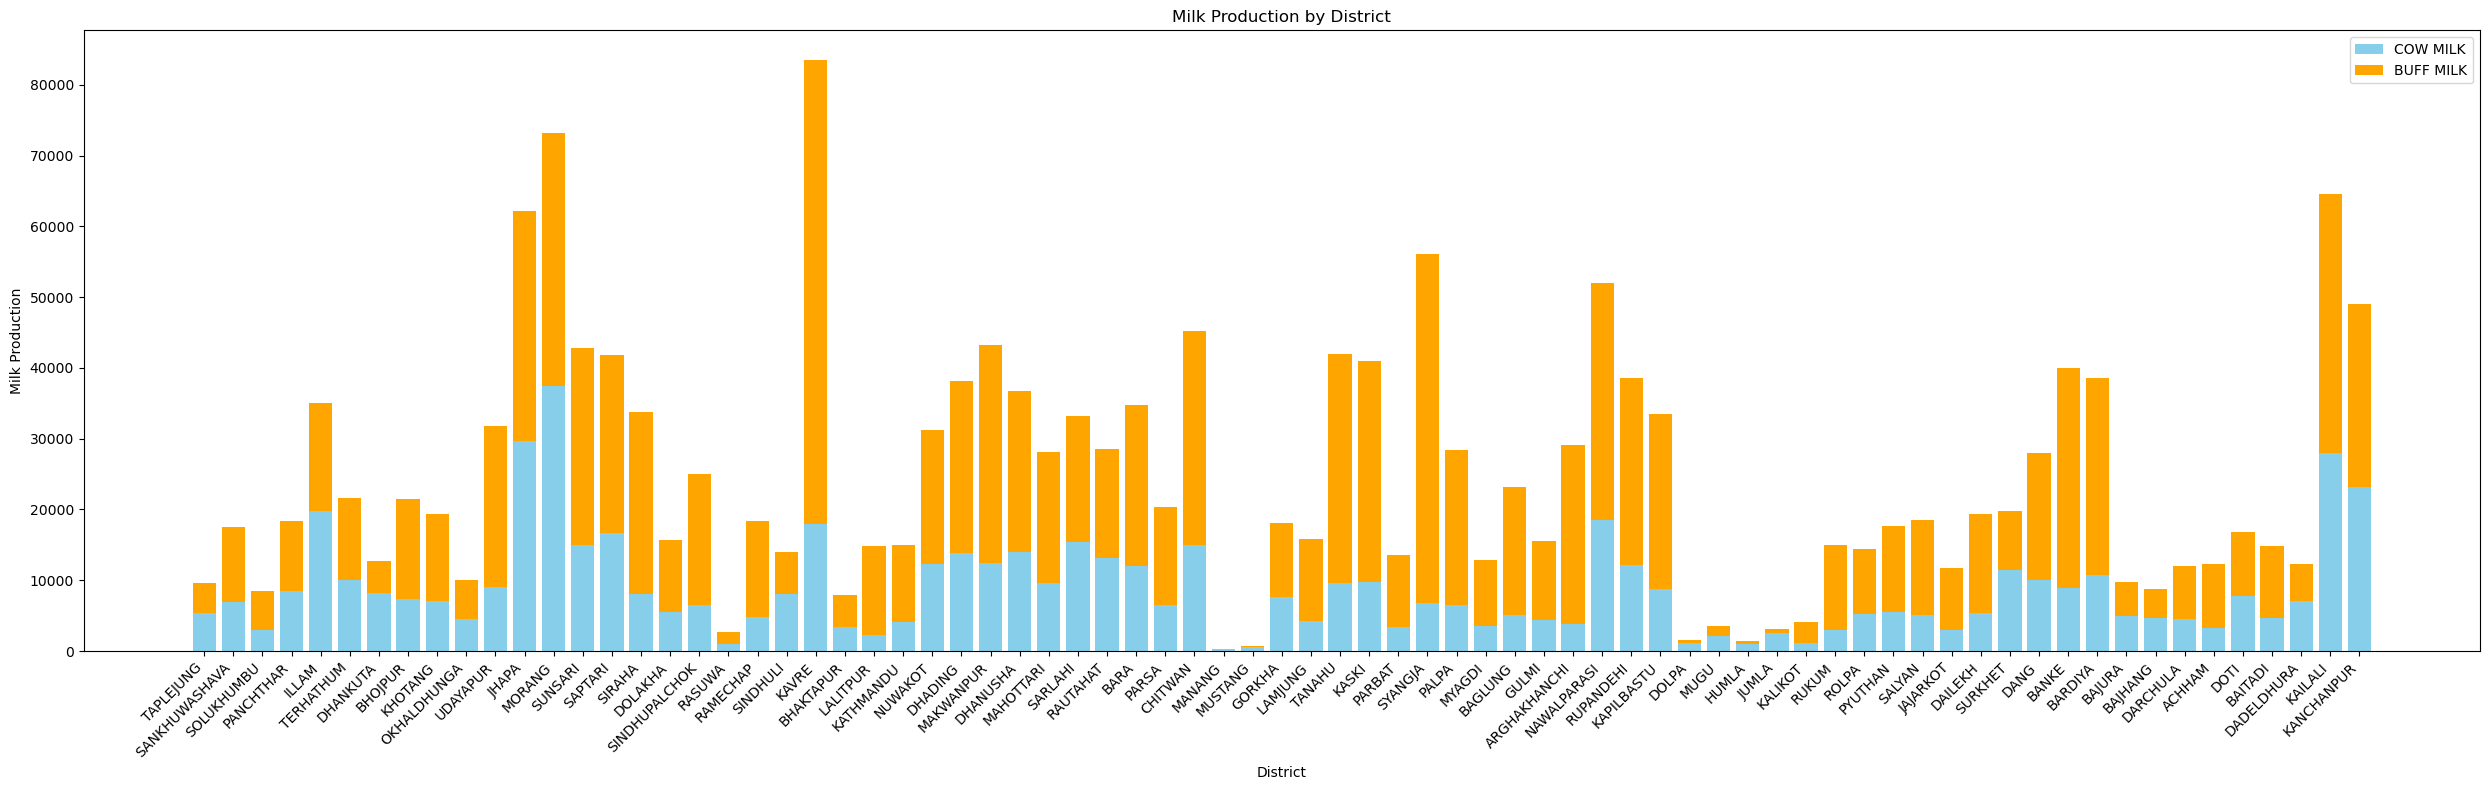

In [28]:
districts = df['DISTRICT']
cow_milk = df['COW MILK']
buff_milk = df['BUFF MILK']

# Plotting the histograms
plt.figure(figsize=(25, 8))

# Histogram for COW MILK
plt.bar(districts, cow_milk, color='skyblue', label='COW MILK')
# Histogram for BUFFALO MILK
plt.bar(districts, buff_milk, color='orange', bottom=cow_milk, label='BUFF MILK')


plt.title('Milk Production by District')
plt.xlabel('District')
plt.ylabel('Milk Production')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()  # Adjust layout to prevent label overlap
plt.show()

**Total Milk Production Distribution Across Districts Of Nepal**

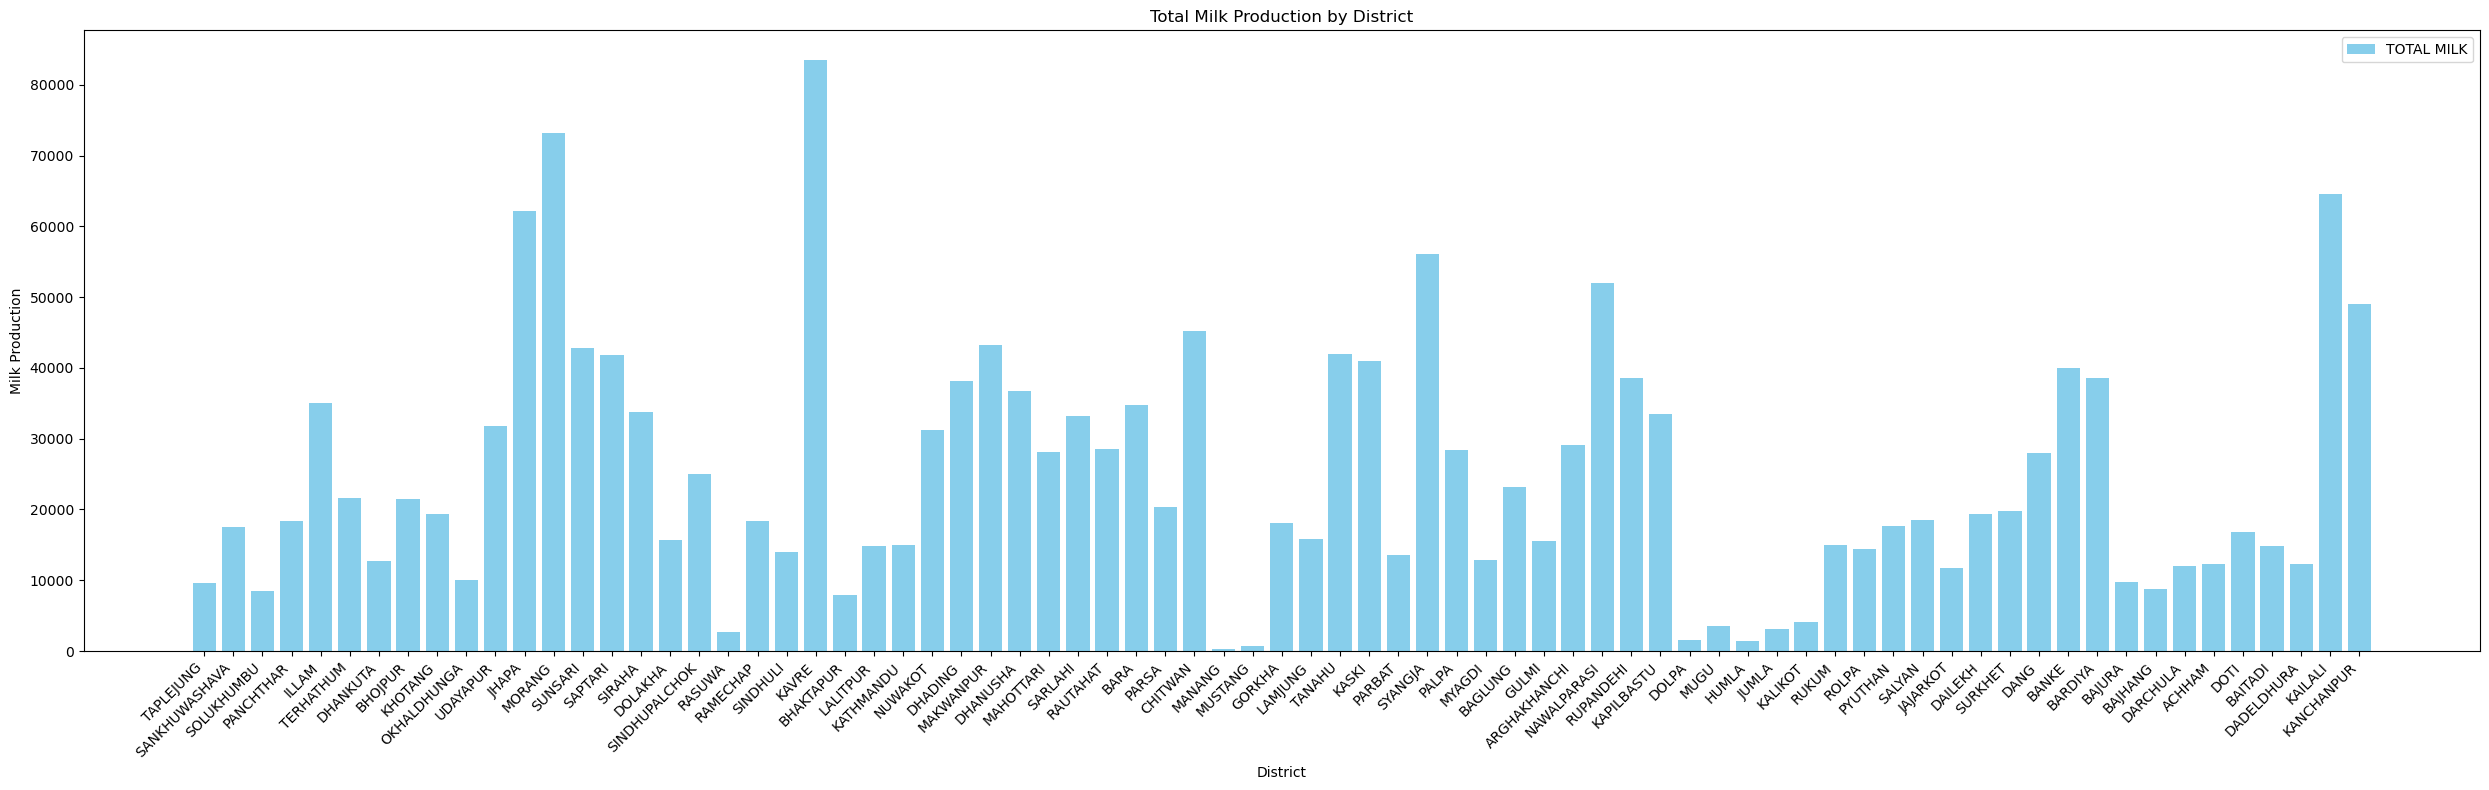

In [29]:
districts = df['DISTRICT']
total_milk = df['TOTAL MILK PRODUCED']


# Plotting the histograms
plt.figure(figsize=(25, 8))

# Histogram for TOTAL MEAT
plt.bar(districts, total_milk, color='skyblue', label='TOTAL MILK')

plt.title('Total Milk Production by District')
plt.xlabel('District')
plt.ylabel('Milk Production')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()  # Adjust layout to prevent label overlap
plt.show()

### <font color="purple">Egg Production</font>

**Egg Production Distribution From Various Domestic Birds Across Districts Of Nepal**

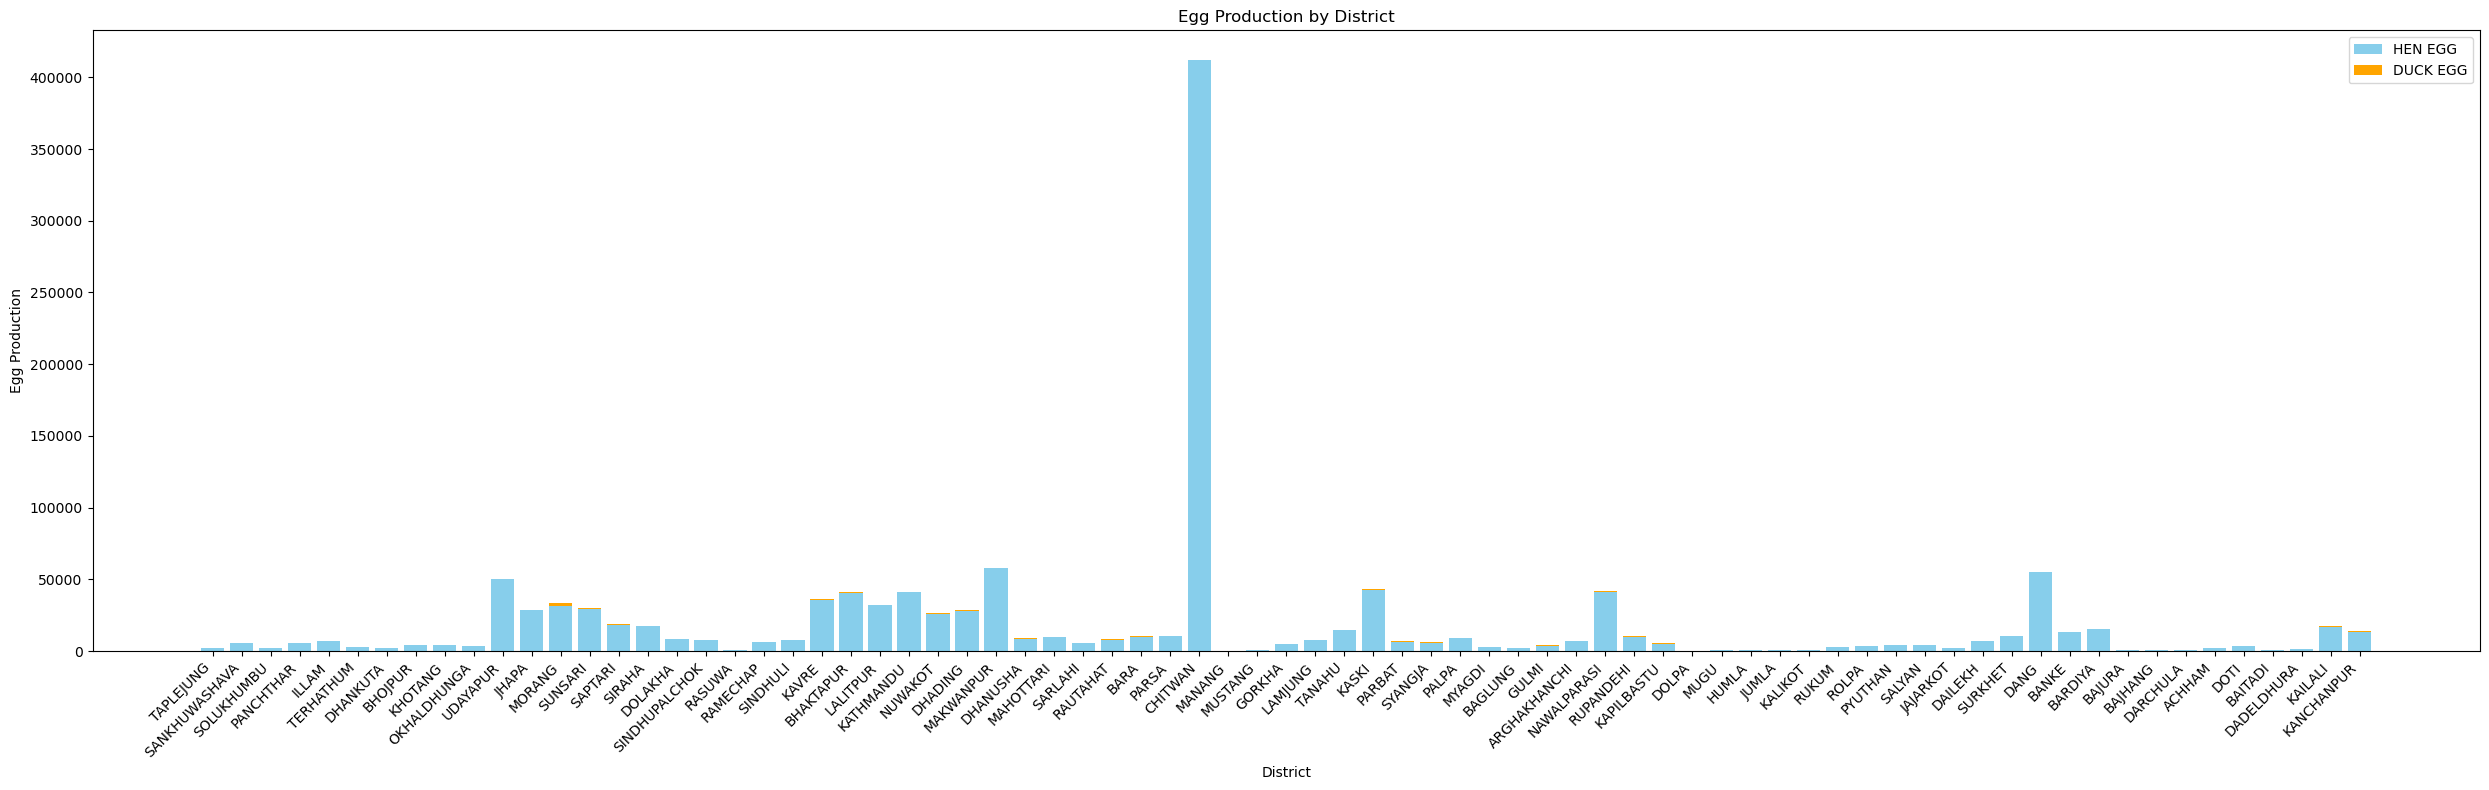

In [30]:
districts = df['DISTRICT']
hen_egg = df['HEN EGG']
duck_egg = df['DUCK EGG']

# Plotting the histograms
plt.figure(figsize=(25, 8))

# Histogram for HEN EGG
plt.bar(districts, hen_egg, color='skyblue', label='HEN EGG')
# Histogram for DUCK EGG
plt.bar(districts, duck_egg, color='orange', bottom=hen_egg, label='DUCK EGG')


plt.title('Egg Production by District')
plt.xlabel('District')
plt.ylabel('Egg Production')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()  # Adjust layout to prevent label overlap
plt.show()

**Total Egg Production Distribution Across Districts Of Nepal**

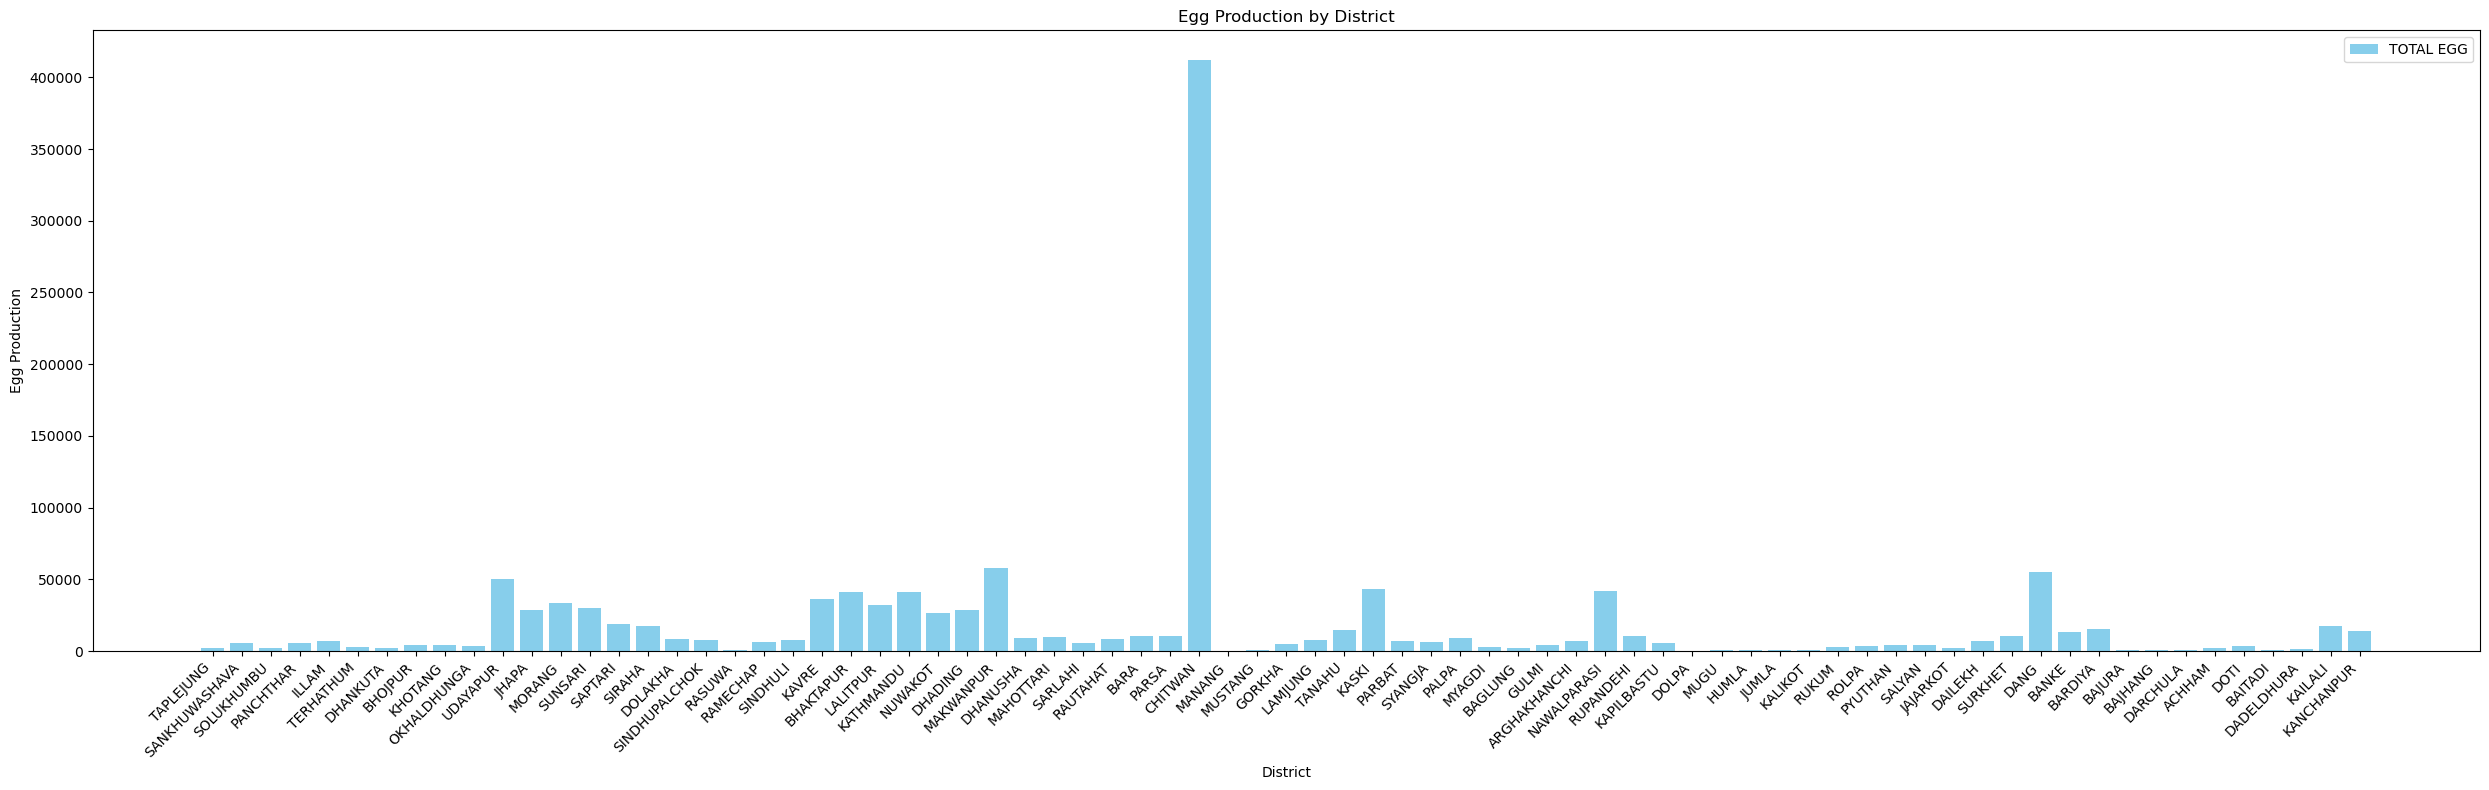

In [31]:
districts = df['DISTRICT']
total_egg = df['TOTAL EGG']


# Plotting the histograms
plt.figure(figsize=(25, 8))

# Histogram for TOTAL MEAT
plt.bar(districts, total_egg, color='skyblue', label='TOTAL EGG')

plt.title('Egg Production by District')
plt.xlabel('District')
plt.ylabel('Egg Production')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()  # Adjust layout to prevent label overlap
plt.show()

### <font color="purple">Wool Production</font>

**Total Sheep Wool Production Distribution Across Districts Of Nepal**

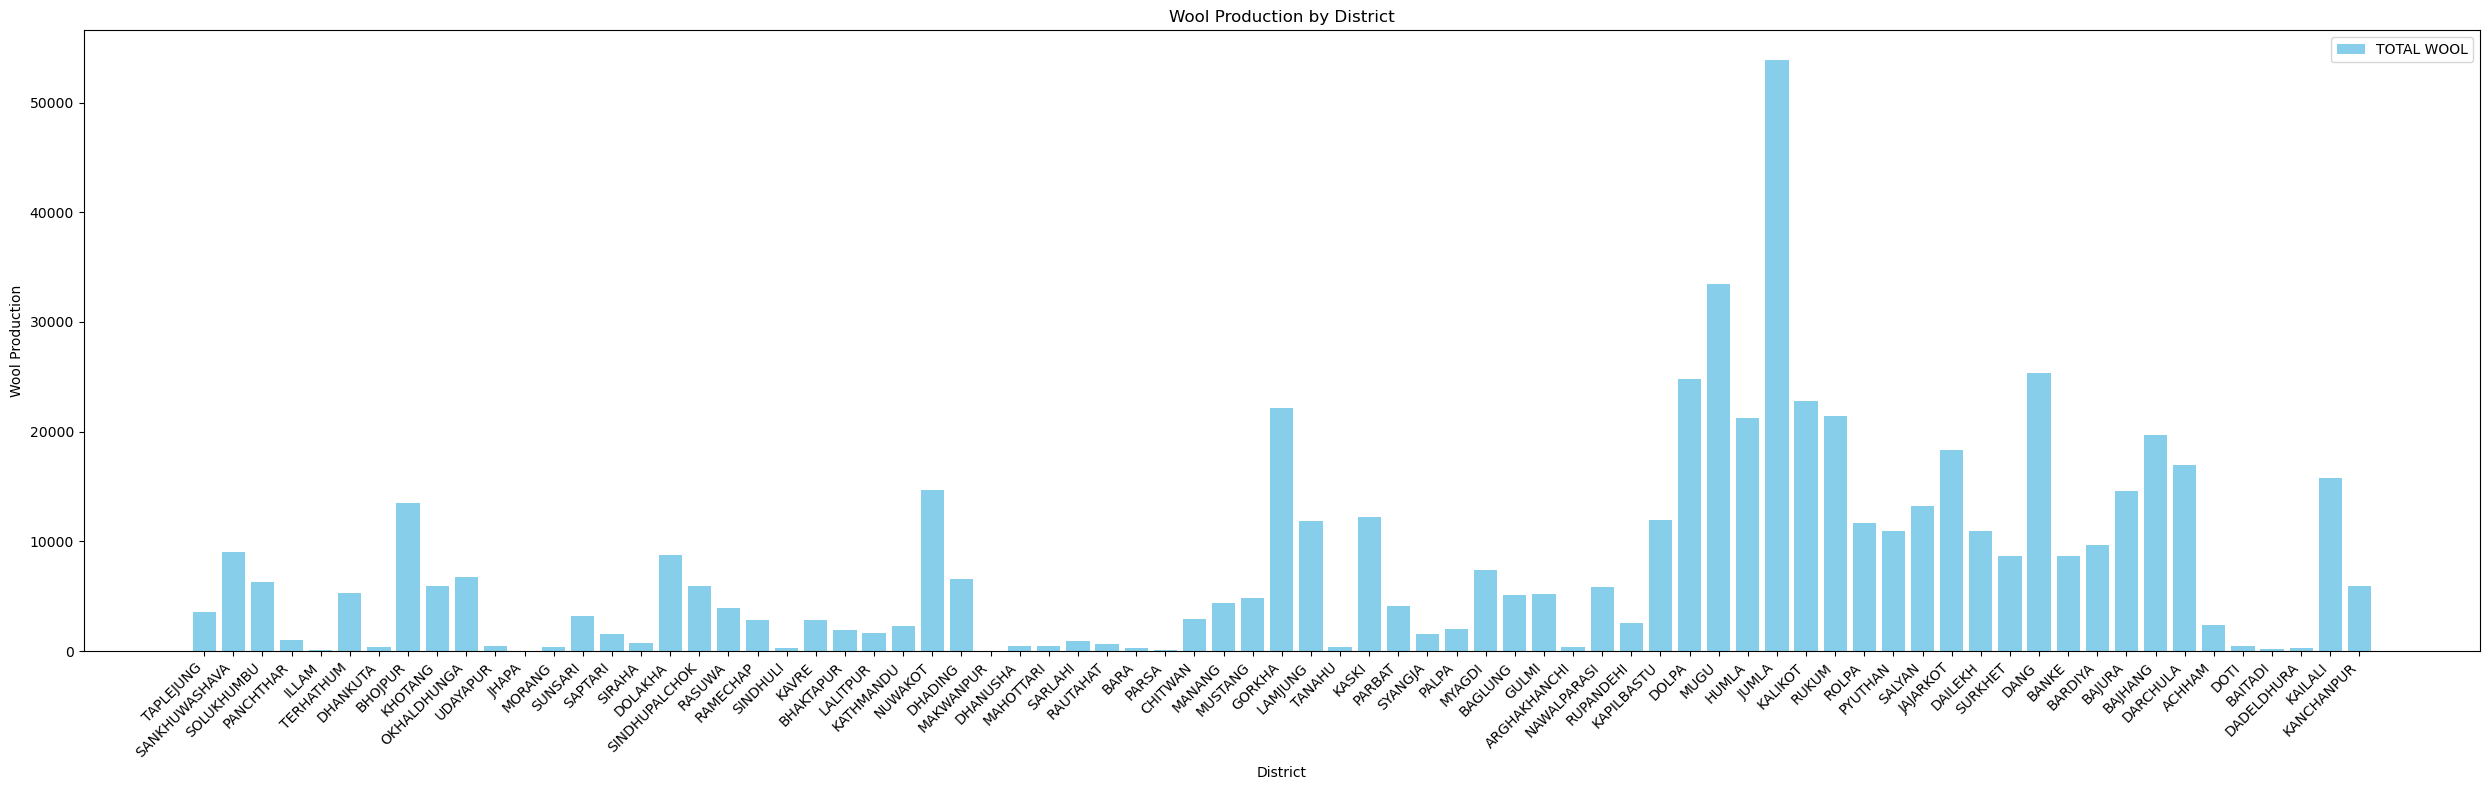

In [32]:
districts = df['DISTRICT']
total_wool = df['SHEEP WOOL PRODUCED']


# Plotting the histograms
plt.figure(figsize=(25, 8))

# Histogram for TOTAL MEAT
plt.bar(districts, total_wool, color='skyblue', label='TOTAL WOOL')

plt.title('Wool Production by District')
plt.xlabel('District')
plt.ylabel('Wool Production')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()  # Adjust layout to prevent label overlap
plt.show()

### <font color="purple">Distribution of Cotton Production Across Districts of Nepal</font>

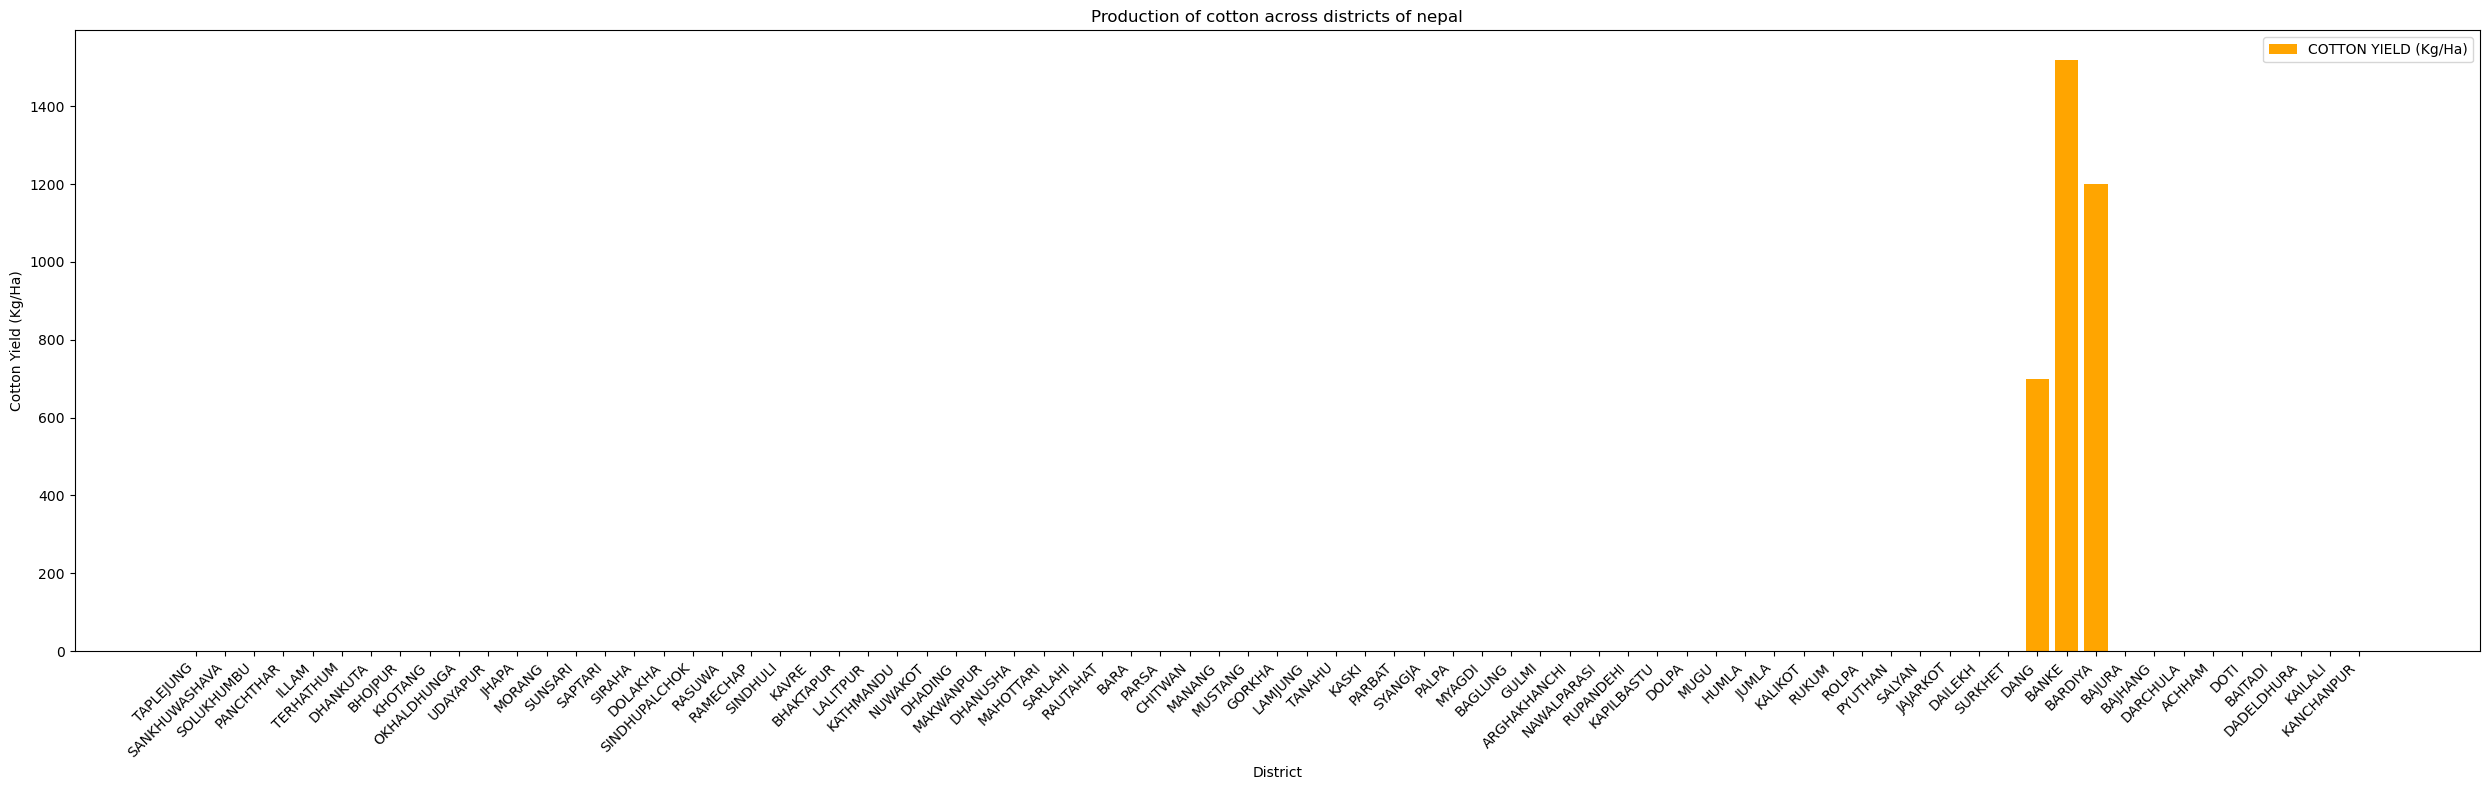

In [33]:
districts = df['DISTRICT']
cotton = df['COTTON YIELD (Kg/Ha)']

# Plotting the histograms
plt.figure(figsize=(25, 8))

# Histogram for COTTON YIELD
plt.bar(districts, cotton, color='orange', label='COTTON YIELD (Kg/Ha)')


plt.title('Production of cotton across districts of nepal')
plt.xlabel('District')
plt.ylabel('Cotton Yield (Kg/Ha)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()  # Adjust layout to prevent label overlap
plt.show()

## <font color="green">Visual Insights : Data Compositions</font>

### <font color="purple">Composition of Total Milk Production Across Nepal</font>

In [34]:
# Calculate total production for each type of milk
total_milk_production = df[['COW MILK', 'BUFF MILK']].sum()

# Create a 3D pie chart for milk production composition
fig = go.Figure(data=[go.Pie(labels=total_milk_production.index,
                             values=total_milk_production.values,
                             textinfo='label+percent',
                             hole=0.3)])
fig.update_layout(title_text="Composition of Total Milk Production Across Nepal")


### <font color="purple">Composition of Total Livestock Population Across Nepal</font>

In [35]:
# Select the columns containing counts for each type of livestock
livestock_columns = ['MILKING COWS NO.', 'MILKING BUFFALOES NO.', 'SHEEPS NO.', 'HORSES/ASSES', 'RABBIT', 'LAYING HEN', 'LAYING DUCK']

# Calculate the total number of each type of livestock
total_livestock = df[livestock_columns].sum()

# Create a 3D pie chart for livestock population distribution
fig = go.Figure(data=[go.Pie(labels=total_livestock.index,
                             values=total_livestock.values,
                             textinfo='label+percent',
                             hole=0.3)])
fig.update_layout(title_text="Composition of Livestock Population Across Nepal")
fig.show()


### <font color="purple">Composition of Total Meat Production Across Nepal</font>

In [36]:
# Calculate total production for each type of meat
total_meat_production = df[['BUFF', 'MUTTON', 'CHEVON', 'PORK', 'CHICKEN', 'DUCK MEAT']].sum()

# Create a 3D pie chart for meat production composition
fig = go.Figure(data=[go.Pie(labels=total_meat_production.index,
                             values=total_meat_production.values,
                             textinfo='label+percent',
                             hole=0.3)])
fig.update_layout(title_text="Composition of Total Meat Production Across Nepal")

### <font color="purple">Composition of Total Milk Production Across Nepal</font>

In [37]:
# Calculate total production for each type of milk
total_milk_production = df[['COW MILK', 'BUFF MILK']].sum()

# Create a 3D pie chart for milk production composition
fig = go.Figure(data=[go.Pie(labels=total_milk_production.index,
                             values=total_milk_production.values,
                             textinfo='label+percent',
                             hole=0.3)])
fig.update_layout(title_text="Composition of Total Milk Production Across Nepal")


### <font color="purple">Composition of Total Egg Production Across Nepal</font>

In [38]:
# Calculate total production for each type of egg
total_egg_production = df[['HEN EGG', 'DUCK EGG']].sum()

# Create a 3D pie chart for milk production composition
fig = go.Figure(data=[go.Pie(labels=total_egg_production.index,
                             values=total_egg_production.values,
                             textinfo='label+percent',
                             hole=0.3)])
fig.update_layout(title_text="Composition of Total Egg Production Across Nepal")


## <font color="green">Visual Insights : Relationship Analysis</font>

### <font color="purple">Analyzing Relation Between Milking Cattles Population & Milk Production</font>

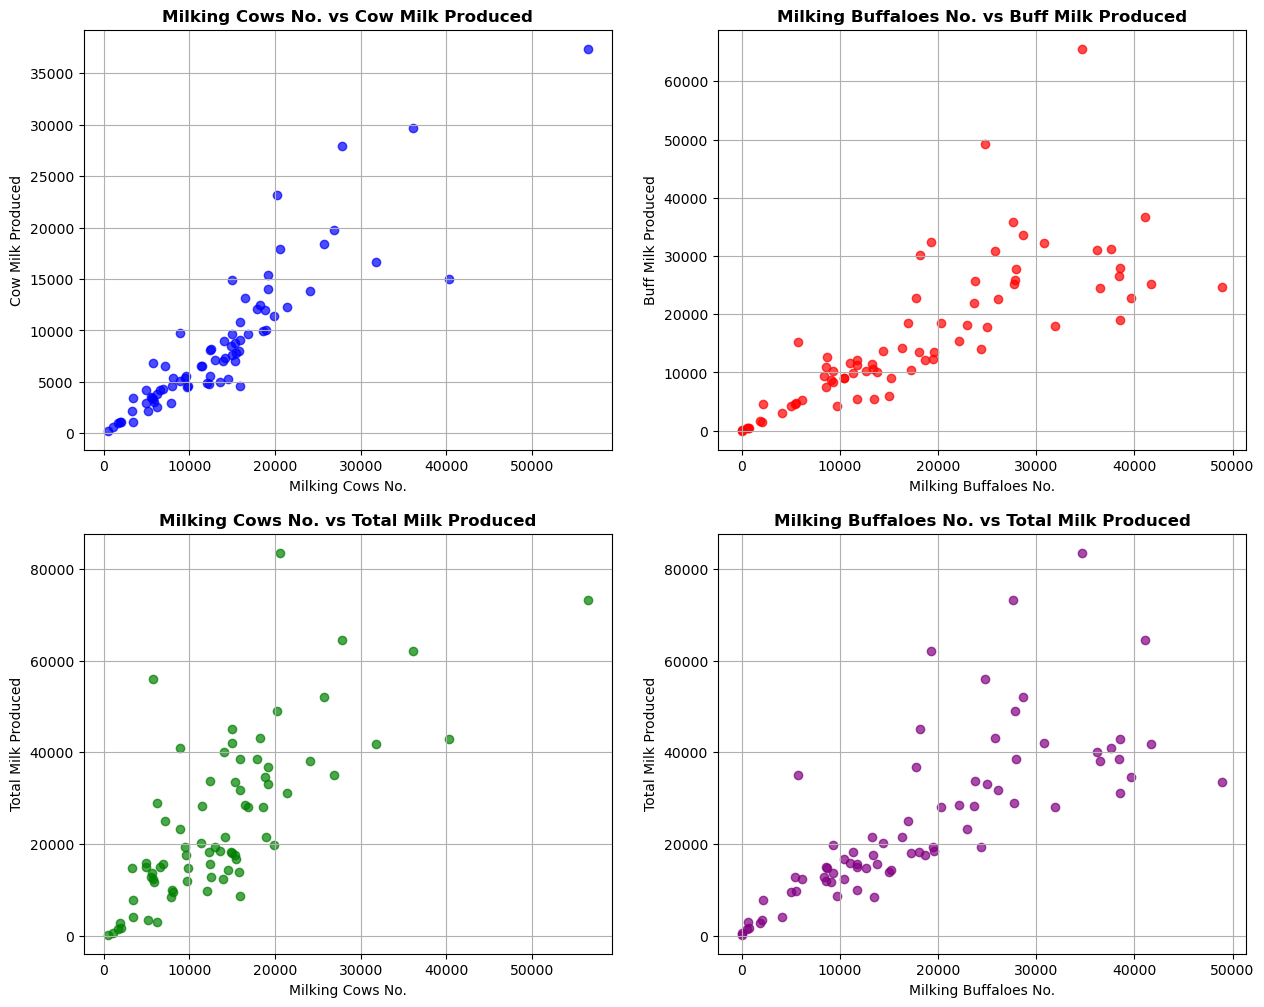

In [39]:
# Extracting the columns 'MILKING COWS NO.' and 'COW MILK'
milking_cows = df['MILKING COWS NO.']
cow_milk_produced = df['COW MILK']

# Extracting the columns 'MILKING BUFFALOES NO.' and 'BUFF MILK'
milking_buffalo = df['MILKING BUFFALOES NO.']
buff_milk_produced = df['BUFF MILK']

# Extracting the columns 'TOTAL MILK PRODUCED'
total_milk_produced = df['TOTAL MILK PRODUCED']

# Create a figure and subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plotting the scatter plot for Milking Cows vs Cow Milk Produced
axes[0, 0].scatter(milking_cows, cow_milk_produced, color='blue', alpha=0.7)
axes[0, 0].set_title('Milking Cows No. vs Cow Milk Produced', fontweight='bold')
axes[0, 0].set_xlabel('Milking Cows No.')
axes[0, 0].set_ylabel('Cow Milk Produced')
axes[0, 0].grid(True)

# Plotting the scatter plot for Milking Buffaloes vs Buff Milk Produced
axes[0, 1].scatter(milking_buffalo, buff_milk_produced, color='red', alpha=0.7)
axes[0, 1].set_title('Milking Buffaloes No. vs Buff Milk Produced', fontweight='bold')
axes[0, 1].set_xlabel('Milking Buffaloes No.')
axes[0, 1].set_ylabel('Buff Milk Produced')
axes[0, 1].grid(True)

# Plotting the scatter plot for Milking Cows vs Total Milk Produced
axes[1, 0].scatter(milking_cows, total_milk_produced, color='green', alpha=0.7)
axes[1, 0].set_title('Milking Cows No. vs Total Milk Produced', fontweight='bold')
axes[1, 0].set_xlabel('Milking Cows No.')
axes[1, 0].set_ylabel('Total Milk Produced')
axes[1, 0].grid(True)

# Plotting the scatter plot for Milking Buffaloes vs Total Milk Produced
axes[1, 1].scatter(milking_buffalo, total_milk_produced, color='purple', alpha=0.7)
axes[1, 1].set_title('Milking Buffaloes No. vs Total Milk Produced', fontweight='bold')
axes[1, 1].set_xlabel('Milking Buffaloes No.')
axes[1, 1].set_ylabel('Total Milk Produced')
axes[1, 1].grid(True)


# Show plots
plt.show()

### <font color="purple">Analyzing Relation Between Domestic Egg-Laying Birds Population & Egg Production</font>

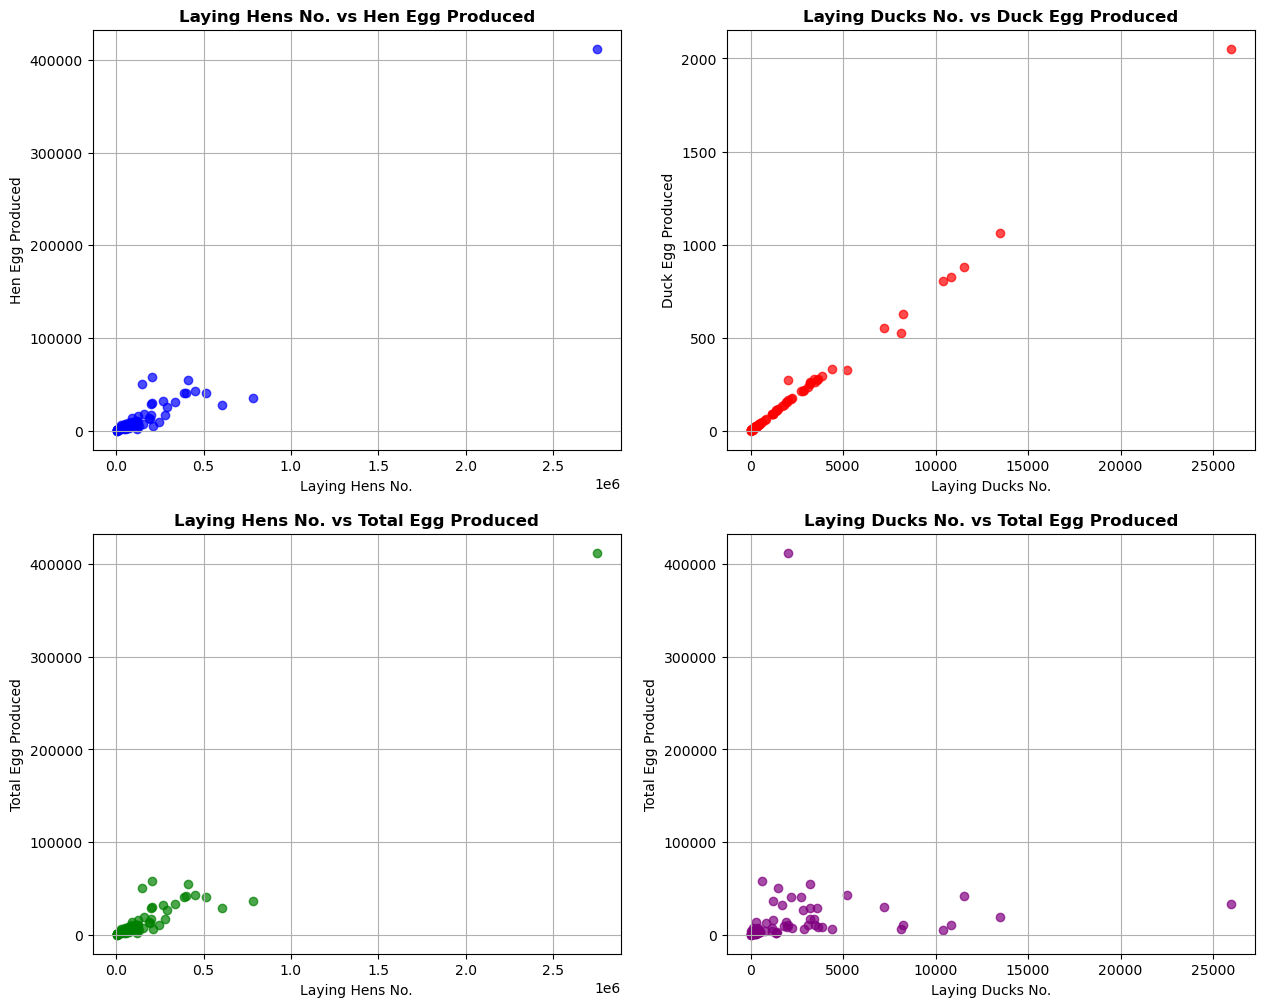

In [40]:
# Extracting the columns 'LAYING HEN' and 'HEN EGG'
laying_hen = df['LAYING HEN']
hen_egg_produced = df['HEN EGG']

# Extracting the columns 'LAYING DUCK' and 'DUCK EGG'
laying_duck = df['LAYING DUCK']
duck_egg_produced = df['DUCK EGG']

# Extracting the columns 'TOTAL EGG'
total_egg_produced = df['TOTAL EGG']

# Create a figure and subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plotting the scatter plot for Laying Hen vs Hen Egg Produced
axes[0, 0].scatter(laying_hen, hen_egg_produced, color='blue', alpha=0.7)
axes[0, 0].set_title('Laying Hens No. vs Hen Egg Produced', fontweight='bold')
axes[0, 0].set_xlabel('Laying Hens No.')
axes[0, 0].set_ylabel('Hen Egg Produced')
axes[0, 0].grid(True)

# Plotting the scatter plot for Laying Duck vs Duck Egg Produced
axes[0, 1].scatter(laying_duck, duck_egg_produced, color='red', alpha=0.7)
axes[0, 1].set_title('Laying Ducks No. vs Duck Egg Produced', fontweight='bold')
axes[0, 1].set_xlabel('Laying Ducks No.')
axes[0, 1].set_ylabel('Duck Egg Produced')
axes[0, 1].grid(True)

# Plotting the scatter plot for Laying Hen vs Total Egg Produced
axes[1, 0].scatter(laying_hen, total_egg_produced, color='green', alpha=0.7)
axes[1, 0].set_title('Laying Hens No. vs Total Egg Produced', fontweight='bold')
axes[1, 0].set_xlabel('Laying Hens No.')
axes[1, 0].set_ylabel('Total Egg Produced')
axes[1, 0].grid(True)

# Plotting the scatter plot for Laying Duck vs Total Egg Produced
axes[1, 1].scatter(laying_duck, total_egg_produced, color='purple', alpha=0.7)
axes[1, 1].set_title('Laying Ducks No. vs Total Egg Produced', fontweight='bold')
axes[1, 1].set_xlabel('Laying Ducks No.')
axes[1, 1].set_ylabel('Total Egg Produced')
axes[1, 1].grid(True)


# Show plots
plt.show()

### <font color="purple">Analyzing Relation Between Individual Commodity Meat Production & Total Meat Production</font>

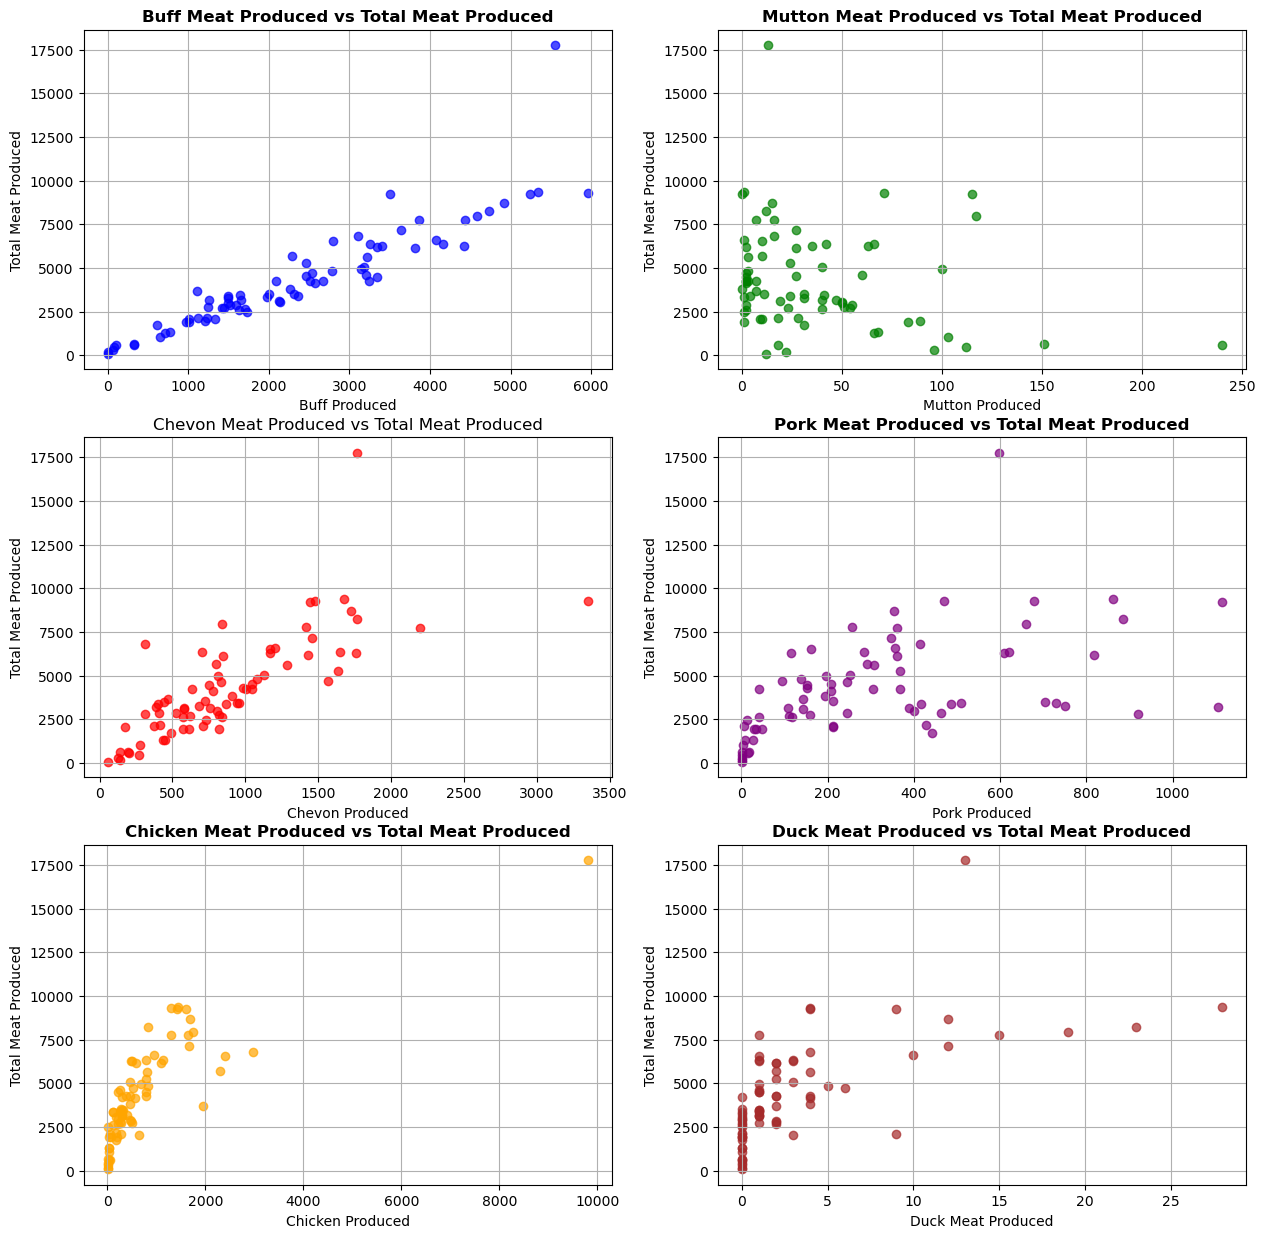

In [41]:
# Extracting the columns from the DataFrame
buff = df['BUFF']
mutton = df['MUTTON']
chevon = df['CHEVON']
pork = df['PORK']
chicken = df['CHICKEN']
duck_meat = df['DUCK MEAT']
total_meat = df['TOTAL MEAT']

# Create a figure and subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Plotting the scatter plots for each meat-giving commodity vs Total Meat
axes[0, 0].scatter(buff, total_meat, color='blue', alpha=0.7)
axes[0, 0].set_title('Buff Meat Produced vs Total Meat Produced', fontweight="bold")
axes[0, 0].set_xlabel('Buff Produced')
axes[0, 0].set_ylabel('Total Meat Produced')
axes[0, 0].grid(True)

axes[0, 1].scatter(mutton, total_meat, color='green', alpha=0.7)
axes[0, 1].set_title('Mutton Meat Produced vs Total Meat Produced', fontweight="bold")
axes[0, 1].set_xlabel('Mutton Produced')
axes[0, 1].set_ylabel('Total Meat Produced')
axes[0, 1].grid(True)

axes[1, 0].scatter(chevon, total_meat, color='red', alpha=0.7)
axes[1, 0].set_title('Chevon Meat Produced vs Total Meat Produced')
axes[1, 0].set_xlabel('Chevon Produced')
axes[1, 0].set_ylabel('Total Meat Produced')
axes[1, 0].grid(True)

axes[1, 1].scatter(pork, total_meat, color='purple', alpha=0.7)
axes[1, 1].set_title('Pork Meat Produced vs Total Meat Produced', fontweight="bold")
axes[1, 1].set_xlabel('Pork Produced')
axes[1, 1].set_ylabel('Total Meat Produced')
axes[1, 1].grid(True)

axes[2, 0].scatter(chicken, total_meat, color='orange', alpha=0.7)
axes[2, 0].set_title('Chicken Meat Produced vs Total Meat Produced', fontweight="bold")
axes[2, 0].set_xlabel('Chicken Produced')
axes[2, 0].set_ylabel('Total Meat Produced')
axes[2, 0].grid(True)

axes[2, 1].scatter(duck_meat, total_meat, color='brown', alpha=0.7)
axes[2, 1].set_title('Duck Meat Produced vs Total Meat Produced', fontweight="bold")
axes[2, 1].set_xlabel('Duck Meat Produced')
axes[2, 1].set_ylabel('Total Meat Produced')
axes[2, 1].grid(True)

# Show plots
plt.show()

### <font color="purple">Analyzing Relation Between Cotton Area, Production In The Area & Total Cotton Production</font>

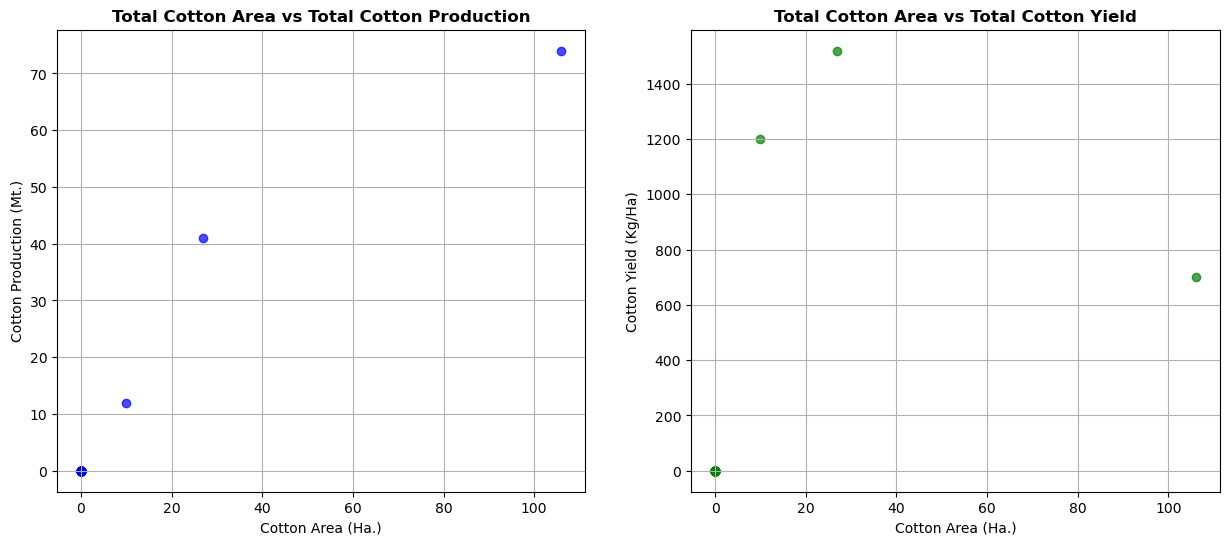

In [42]:
# Extracting the columns from the DataFrame
cotton_area = df['COTTON AREA (Ha.)']
cotton_production = df['COTTON PROD. (Mt.)']
cotton_yield = df['COTTON YIELD (Kg/Ha)']

# Create a figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plotting the scatter plot for Cotton Area vs Cotton Production
axes[0].scatter(cotton_area, cotton_production, color='blue', alpha=0.7)
axes[0].set_title('Total Cotton Area vs Total Cotton Production', fontweight="bold")
axes[0].set_xlabel('Cotton Area (Ha.)')
axes[0].set_ylabel('Cotton Production (Mt.)')
axes[0].grid(True)

# Plotting the scatter plot for Cotton Area vs Cotton Yield
axes[1].scatter(cotton_area, cotton_yield, color='green', alpha=0.7)
axes[1].set_title('Total Cotton Area vs Total Cotton Yield', fontweight="bold")
axes[1].set_xlabel('Cotton Area (Ha.)')
axes[1].set_ylabel('Cotton Yield (Kg/Ha)')
axes[1].grid(True)

# Show plots
plt.show()

## <font color="green">Visual Insights : Commodity Volume Analysis</font>

### <font color="purple">Distribution of Milk Production Volumes</font>

In [43]:
# Assuming milk production data is stored in a DataFrame called 'df'
milk_data = df[['COW MILK', 'BUFF MILK']]

# Creating the box plot
fig = px.box(milk_data, labels={'variable': 'Milk Type', 'value': 'Milk Production'})


# Customizing the layout
fig.update_layout(title='Milk Production Volume Distribution',
                  xaxis_title='Milk Type',
                  yaxis_title='Milk Production',
                  xaxis=dict(showgrid=False),  # Remove grid lines on x-axis
                  yaxis=dict(showgrid=False))  # Remove grid lines on y-axis

# Showing the plot
fig.show()


### <font color="purple">Distribution of Meat Volumes</font>

In [44]:
# Assuming meat production data is stored in a DataFrame called 'df'
meat_data = df[['BUFF', 'MUTTON', 'CHEVON', 'PORK', 'CHICKEN', 'DUCK MEAT']]

# Creating the box plot
fig = px.box(meat_data, labels={'variable': 'Meat Type', 'value': 'Meat Production'})

# Customizing the layout
fig.update_layout(title='Meat Production Volume Distribution',  # Updated title
                  xaxis_title='Meat Type',  # Updated x-axis label
                  yaxis_title='Meat Production',  # Updated y-axis label
                  xaxis=dict(showgrid=False),  # Remove grid lines on x-axis
                  yaxis=dict(showgrid=False))  # Remove grid lines on y-axis

# Showing the plot
fig.show()


### <font color="purple">Distribution of Egg Volumes</font>

In [45]:
# Assuming meat production data is stored in a DataFrame called 'df'
egg_data = df[['HEN EGG', 'DUCK EGG']]

# Creating the box plot
fig = px.box(egg_data, labels={'variable': 'Egg Type', 'value': 'Egg Production'})

# Customizing the layout
fig.update_layout(title='Egg Production Volume Distribution',  # Updated title
                  xaxis_title='Egg Type',  # Updated x-axis label
                  yaxis_title='Egg Production',  # Updated y-axis label
                  xaxis=dict(showgrid=False),  # Remove grid lines on x-axis
                  yaxis=dict(showgrid=False))  # Remove grid lines on y-axis

# Showing the plot
fig.show()


## <font color="green">Analyzing the districts where the cows' milk production is more/equal to the average production</font>

In [46]:
# Calculating the average production of cow's milk
average_cow_milk_production = df['COW MILK'].mean()
print("############################################################")
print(f"Average Cow Milk Produced : {average_cow_milk_production}")
print("############################################################")

# Filtering the DataFrame to include only rows where cow's milk production is greater than or equal to the average
districts_with_cow_milk_above_average = df[df['COW MILK'] >= average_cow_milk_production]
districts_with_cow_milk_above_average.reset_index(drop=True, inplace=True)

print("Districts Name Where Cows' Milk Production Is More/Equal To The Average Production")
print("##################################################################################")
print(districts_with_cow_milk_above_average['DISTRICT'])
print("##################################################################################")
print(f"Total Count: {districts_with_cow_milk_above_average['DISTRICT'].count()}")
print("##################################################################################")

############################################################
Average Cow Milk Produced : 8584.093333333334
############################################################
Districts Name Where Cows' Milk Production Is More/Equal To The Average Production
##################################################################################
0           ILLAM
1       TERHATHUM
2        UDAYAPUR
3           JHAPA
4          MORANG
5         SUNSARI
6         SAPTARI
7           KAVRE
8         NUWAKOT
9         DHADING
10      MAKWANPUR
11       DHANUSHA
12      MAHOTTARI
13        SARLAHI
14       RAUTAHAT
15           BARA
16        CHITWAN
17         TANAHU
18          KASKI
19    NAWALPARASI
20      RUPANDEHI
21     KAPILBASTU
22        SURKHET
23           DANG
24          BANKE
25        BARDIYA
26        KAILALI
27     KANCHANPUR
Name: DISTRICT, dtype: object
##################################################################################
Total Count: 28
#################################

## <font color="green">Analyzing the districts where the Buffalos' milk production is more/equal to the average production</font>

In [47]:
# Calculating the average production of buffalo's milk
average_buff_milk_production = df['BUFF MILK'].mean()
print("############################################################")
print(f"Average Buffalo Milk Produced : {average_buff_milk_production}")
print("############################################################")

# Filtering the DataFrame to include only rows where buffalo's milk production is greater than or equal to the average
districts_with_buff_milk_above_average = df[df['BUFF MILK'] >= average_buff_milk_production]
districts_with_buff_milk_above_average.reset_index(drop=True, inplace=True)

print("Districts Name Where Buffalos' Milk Production Is More/Equal To The Average Production")
print("######################################################################################")
print(districts_with_buff_milk_above_average['DISTRICT'])
print("######################################################################################")
print(f"Total Count: {districts_with_buff_milk_above_average['DISTRICT'].count()}")
print("######################################################################################")

############################################################
Average Buffalo Milk Produced : 16139.226666666667
############################################################
Districts Name Where Buffalos' Milk Production Is More/Equal To The Average Production
######################################################################################
0          UDAYAPUR
1             JHAPA
2            MORANG
3           SUNSARI
4           SAPTARI
5            SIRAHA
6     SINDHUPALCHOK
7             KAVRE
8           NUWAKOT
9           DHADING
10        MAKWANPUR
11         DHANUSHA
12        MAHOTTARI
13          SARLAHI
14             BARA
15          CHITWAN
16           TANAHU
17            KASKI
18          SYANGJA
19            PALPA
20          BAGLUNG
21     ARGHAKHANCHI
22      NAWALPARASI
23        RUPANDEHI
24       KAPILBASTU
25             DANG
26            BANKE
27          BARDIYA
28          KAILALI
29       KANCHANPUR
Name: DISTRICT, dtype: object
#######################

## <font color="green">Analyzing the districts where both the cows' & buffalos' milk production is more/equal to the average production</font>

In [48]:
# Calculating the average production of total milk (cow's milk + buffalo's milk)
average_total_milk_production = df['TOTAL MILK PRODUCED'].mean()

print("############################################################")
print(f"Average Total Milk Produced : {average_total_milk_production}")
print("############################################################")

# Filtering the DataFrame to include only rows where the total milk production is greater than or equal to the average
districts_with_milk_above_average = df[df['TOTAL MILK PRODUCED'] >= average_total_milk_production]
districts_with_milk_above_average.reset_index(drop=True, inplace=True)

print("Districts Name Where Total Milk Production Is More/Equal To The Average Production")
print("##################################################################################")
print(districts_with_milk_above_average['DISTRICT'])
print("##################################################################################")
print(f"Total Count: {districts_with_milk_above_average['DISTRICT'].count()}")
print("##################################################################################")


############################################################
Average Total Milk Produced : 24723.306666666667
############################################################
Districts Name Where Total Milk Production Is More/Equal To The Average Production
##################################################################################
0             ILLAM
1          UDAYAPUR
2             JHAPA
3            MORANG
4           SUNSARI
5           SAPTARI
6            SIRAHA
7     SINDHUPALCHOK
8             KAVRE
9           NUWAKOT
10          DHADING
11        MAKWANPUR
12         DHANUSHA
13        MAHOTTARI
14          SARLAHI
15         RAUTAHAT
16             BARA
17          CHITWAN
18           TANAHU
19            KASKI
20          SYANGJA
21            PALPA
22     ARGHAKHANCHI
23      NAWALPARASI
24        RUPANDEHI
25       KAPILBASTU
26             DANG
27            BANKE
28          BARDIYA
29          KAILALI
30       KANCHANPUR
Name: DISTRICT, dtype: object
#############

# <font color='#004AAD'>Classification Model Development</font>

## <font color="green">Dataframe Preparation</font>

In [49]:
# Selecting columns that are correlated to milk production
selected_columns = ['MILKING COWS NO.', 'MILKING BUFFALOES NO.', 'COW MILK', 'BUFF MILK', 'TOTAL MILK PRODUCED']
df_M = df.loc[:, selected_columns]

df_M

MILKING COWS NO.  MILKING BUFFALOES NO.  COW MILK  BUFF MILK  \
0               8123                   4987      5389       4257   
1              15342                  13367      6988      10589   
2               7819                  13501      2948       5493   
3              14854                  11331      8511       9835   
4              26821                   5759     19735      15261   
..               ...                    ...       ...        ...   
70             15432                  10381      7843       9010   
71              9845                  12699      4641      10184   
72             13963                   6108      7045       5301   
73             27758                  41103     27905      36677   
74             20164                  27812     23146      25876   

    TOTAL MILK PRODUCED  
0                9645.0  
1               17577.0  
2                8441.0  
3               18346.0  
4               34996.0  
..                  ...  
70              16853.0  
71              14825.0  
72              12346.0  
73              64582.0  
74              49022.0  

[75 rows x 5 columns]

## <font color="green">Discretization Of Target Column</font>

In [50]:
# Discretizing predicting column 'TOTAL MILK PRODUCED' into categories
df_M['PRODUCTION LEVEL'] = pd.cut(df_M['TOTAL MILK PRODUCED'], bins=3, labels=['low', 'medium', 'high'])

df_M

MILKING COWS NO.  MILKING BUFFALOES NO.  COW MILK  BUFF MILK  \
0               8123                   4987      5389       4257   
1              15342                  13367      6988      10589   
2               7819                  13501      2948       5493   
3              14854                  11331      8511       9835   
4              26821                   5759     19735      15261   
..               ...                    ...       ...        ...   
70             15432                  10381      7843       9010   
71              9845                  12699      4641      10184   
72             13963                   6108      7045       5301   
73             27758                  41103     27905      36677   
74             20164                  27812     23146      25876   

    TOTAL MILK PRODUCED PRODUCTION LEVEL  
0                9645.0              low  
1               17577.0              low  
2                8441.0              low  
3               18346.0              low  
4               34996.0           medium  
..                  ...              ...  
70              16853.0              low  
71              14825.0              low  
72              12346.0              low  
73              64582.0             high  
74              49022.0           medium  

[75 rows x 6 columns]

## <font color="green">Feature Selection</font>

In [51]:
# Selecting features and target variable
X = df_M[['MILKING COWS NO.', 'COW MILK', 'MILKING BUFFALOES NO.', 'BUFF MILK']]
y = df_M['PRODUCTION LEVEL']

## <font color="green">Train-Test Split</font>

In [52]:
# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## <font color="green">Model Training</font>

In [53]:
# Initializing and training a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [54]:
# Making predictions on the testing set
y_pred = model.predict(X_test)

# <font color='#004AAD'>Model Performance Evaluation</font>

In [55]:
# Evaluating the model accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\n")

# Evaluating Classification report
print(classification_report(y_test, y_pred))
print("\n")

# Creating Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Accuracy: 0.7333333333333333


              precision    recall  f1-score   support

        high       0.25      0.50      0.33         2
         low       1.00      1.00      1.00         6
      medium       0.80      0.57      0.67         7

    accuracy                           0.73        15
   macro avg       0.68      0.69      0.67        15
weighted avg       0.81      0.73      0.76        15



Confusion Matrix:
[[1 0 1]
 [0 6 0]
 [3 0 4]]


## <font color="green">Confusion Matrix</font>

In [56]:
# Plotting confusion matrix
fig = px.imshow(cm,
                labels=dict(x="Predicted", y="Actual"))

fig.update_layout(title_text="Confusion Matrix",
                  xaxis=dict(title='Predicted'),
                  yaxis=dict(title='Actual'))

fig.show()

## <font color="green">ROC Curve</font>

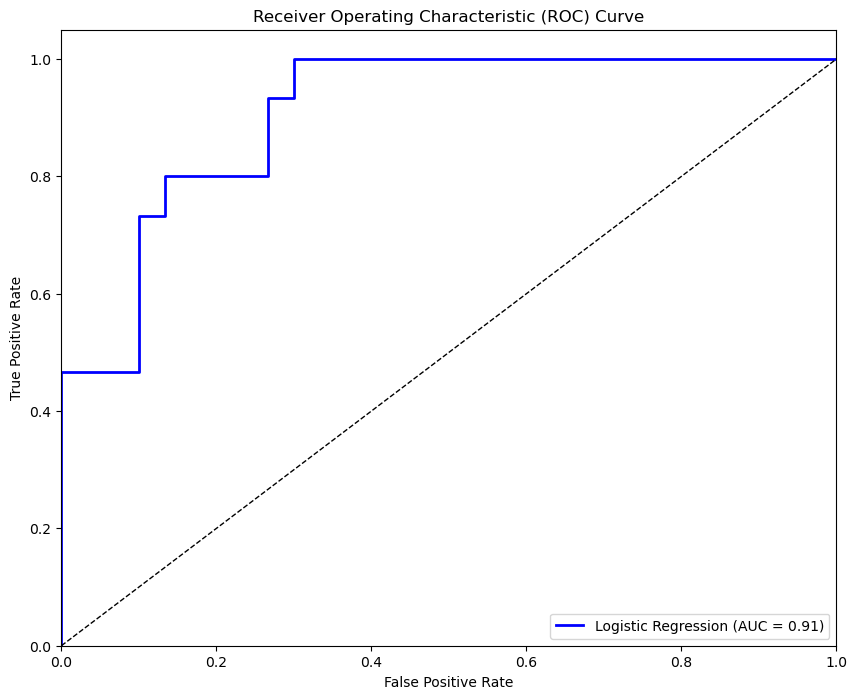

In [57]:
logistic_scores = model.predict_proba(X_test)

# Binarizing the target variable
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

# Plotting ROC curves
plt.figure(figsize=(10, 8))

# Plotting Logistic Regression ROC curve
fpr, tpr, _ = roc_curve(y_test_bin.ravel(), logistic_scores.ravel())
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='blue', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc)

# Plotting random classifier line
plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## <font color="green">Model Output Evaluation : Examining On The Test Dataset</font>

### <font color="purple">Actual vs Predicted Labels</font>

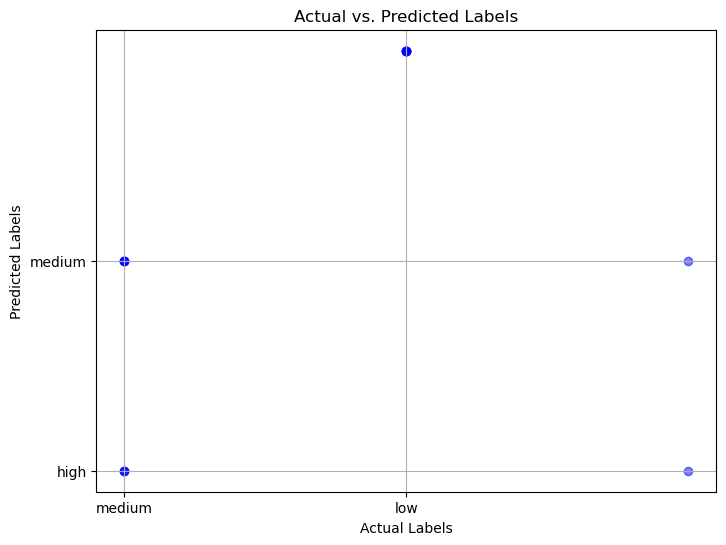

In [58]:
# Creating a scatter plot of actual vs. predicted labels
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Actual vs. Predicted Labels')
plt.xticks([0, 1])  
plt.yticks([0, 1])  
plt.grid(True)
plt.show()

### <font color="purple">Precision-Recall Curve</font>

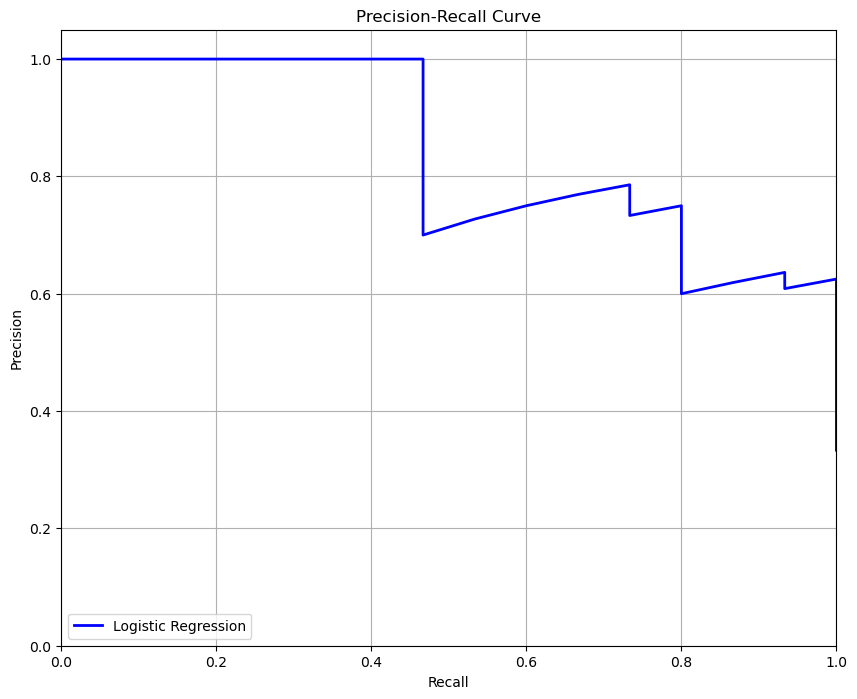

In [59]:
# Computing precision and recall values
precision_lr, recall_lr, _ = precision_recall_curve(y_test_bin.ravel(), logistic_scores.ravel())

# Plotting Precision-Recall curves
plt.figure(figsize=(10, 8))
plt.plot(recall_lr, precision_lr, color='blue', lw=2, label='Logistic Regression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()

# <font color='#004AAD'>CONCLUSION</font>

In conclusion, this analysis delved into the livestock production data of Nepal, aiming to understand and predict various aspects of production. By employing logistic regression, a classification model was built to predict livestock production levels. The model leveraged features such as milking cows, milking buffaloes, cow milk, and buffalo milk to classify production categories. Through evaluation metrics such as accuracy, precision, recall, and the precision-recall curve, the model's performance was assessed. This endeavor sheds light on the potential of machine learning techniques in predicting and managing livestock production, offering insights for stakeholders and policymakers in Nepal's agricultural sector.